In [1]:
%matplotlib inline

from scipy.interpolate import interp1d
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
from main import posts

In [3]:
from collections import defaultdict

# keys are posts' lengths and values are lengths of comments to key-sized-posts
comment_length = defaultdict(list)
for post in posts:
    post_len = len(post.text.split())
    comment_length[post_len] += [len(comment.text.split()) for comment in post.comments]

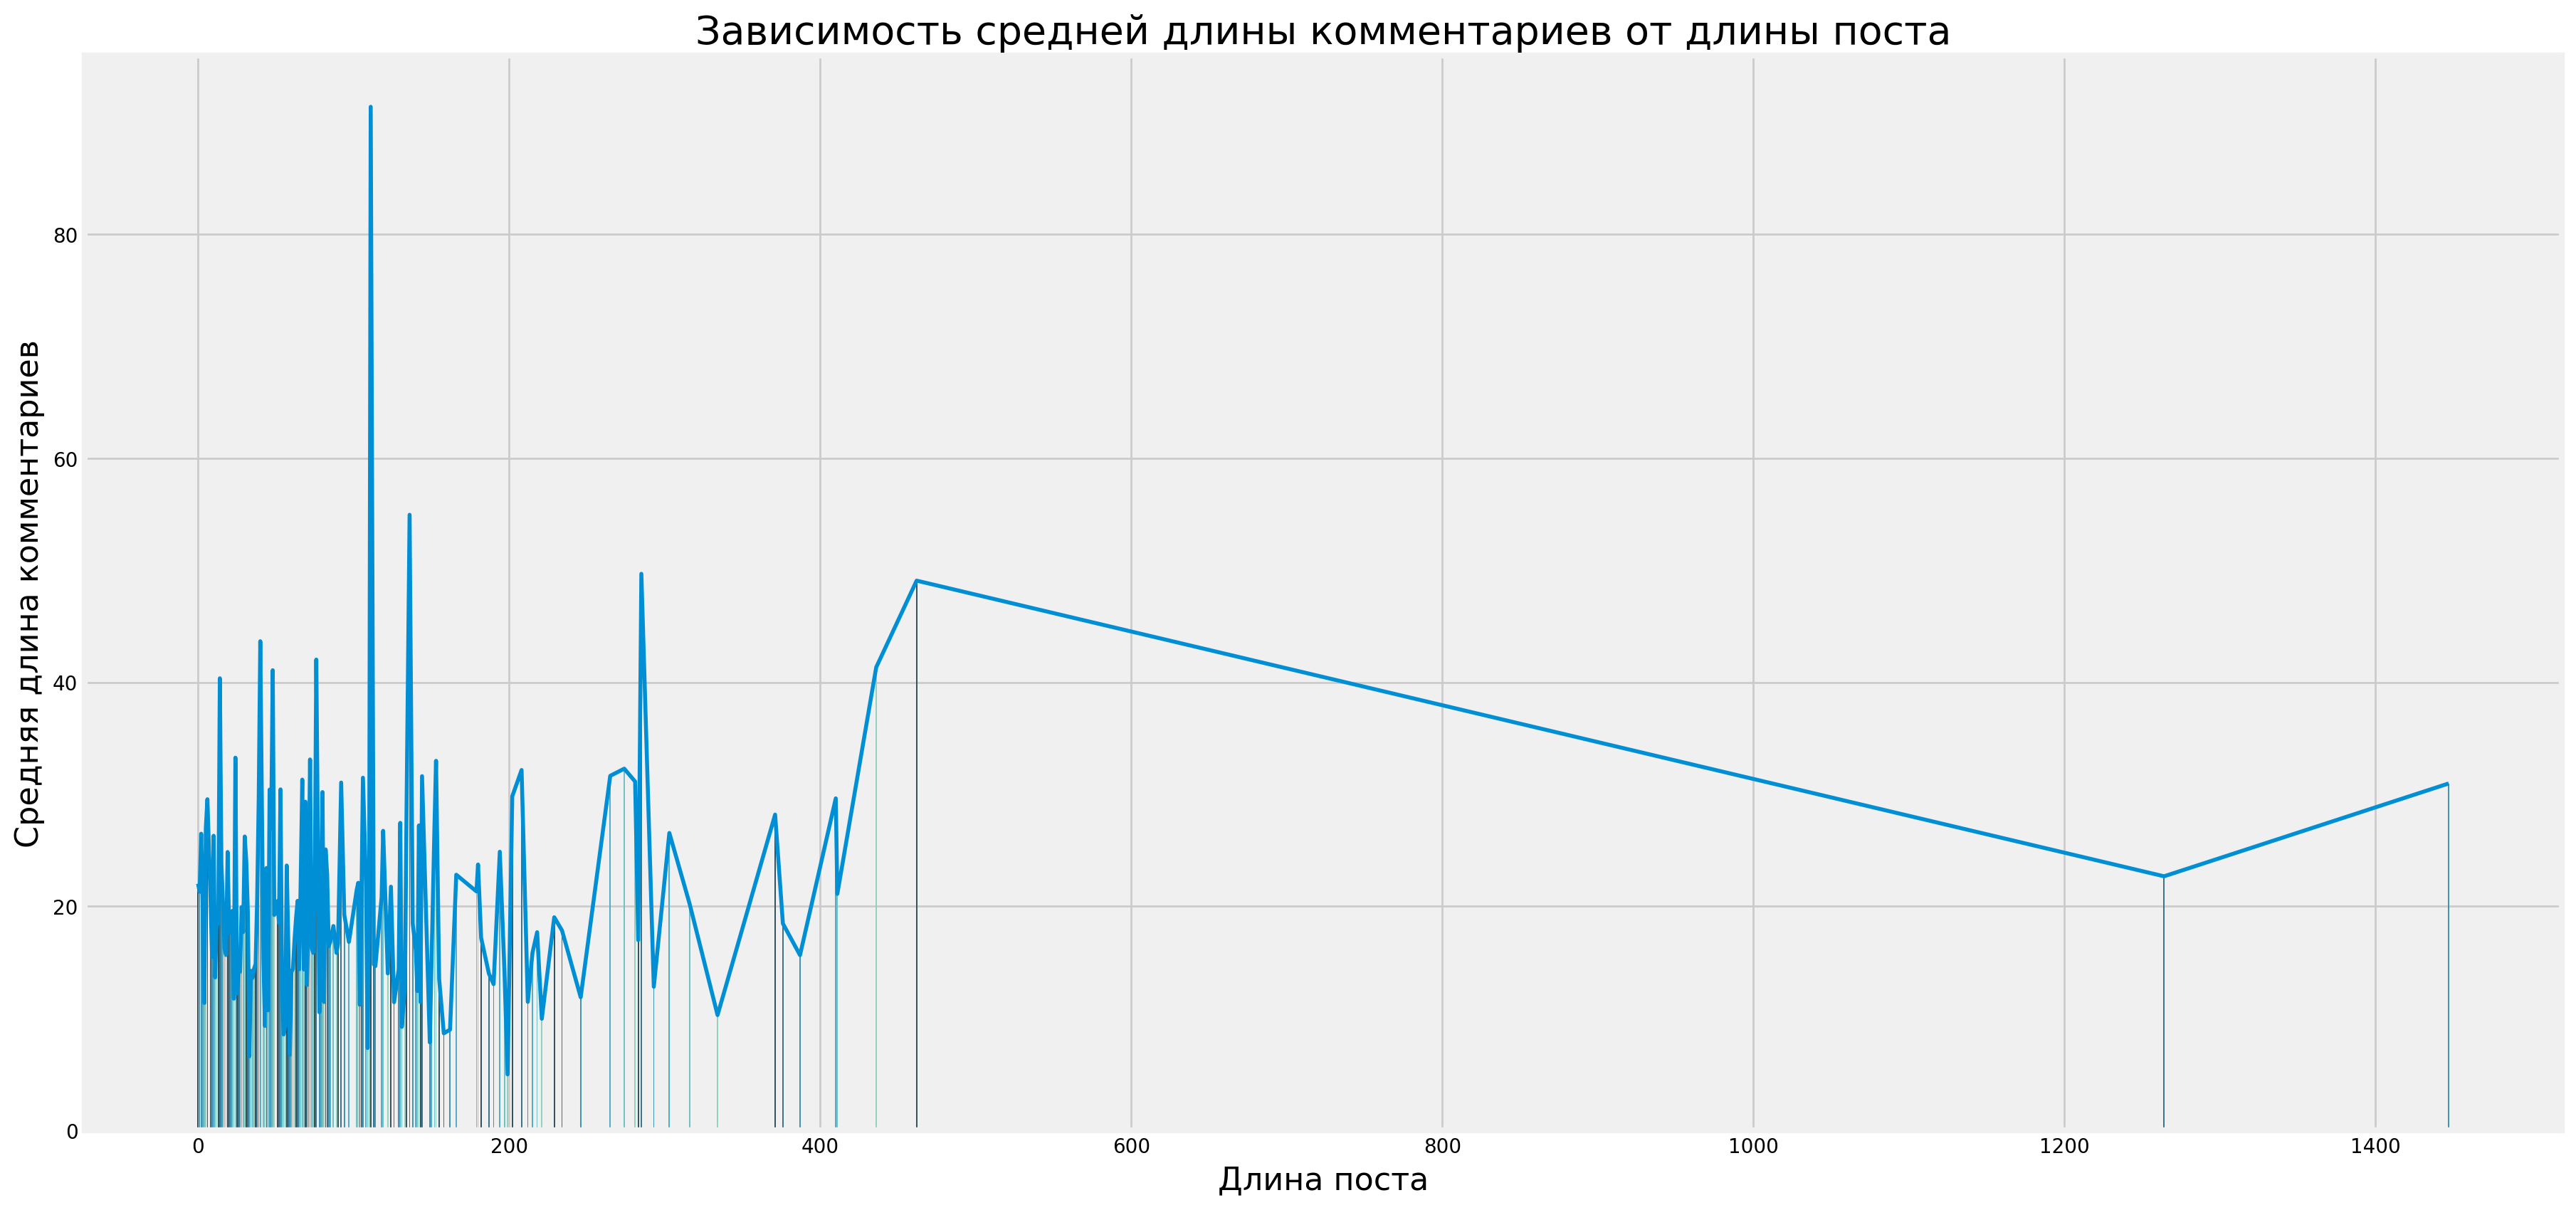

In [4]:
av_comment_len = {}
for key, value in comment_length.items():
    av_comment_len[key] = round(sum(value) / len(value), 2)
    
x = sorted(av_comment_len.keys())
y = [av_comment_len[elem] for elem in x]

colors = sns.color_palette('GnBu_d')

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color=colors)
plt.plot(x, y, linewidth=2)

plt.title('Зависимость средней длины комментариев от длины поста',  fontsize=20)
plt.ylabel('Средняя длина комментариев',  fontsize=16)
plt.xlabel('Длина поста',  fontsize=16)

plt.show()

Уберем самые правые выбросы по длине поста

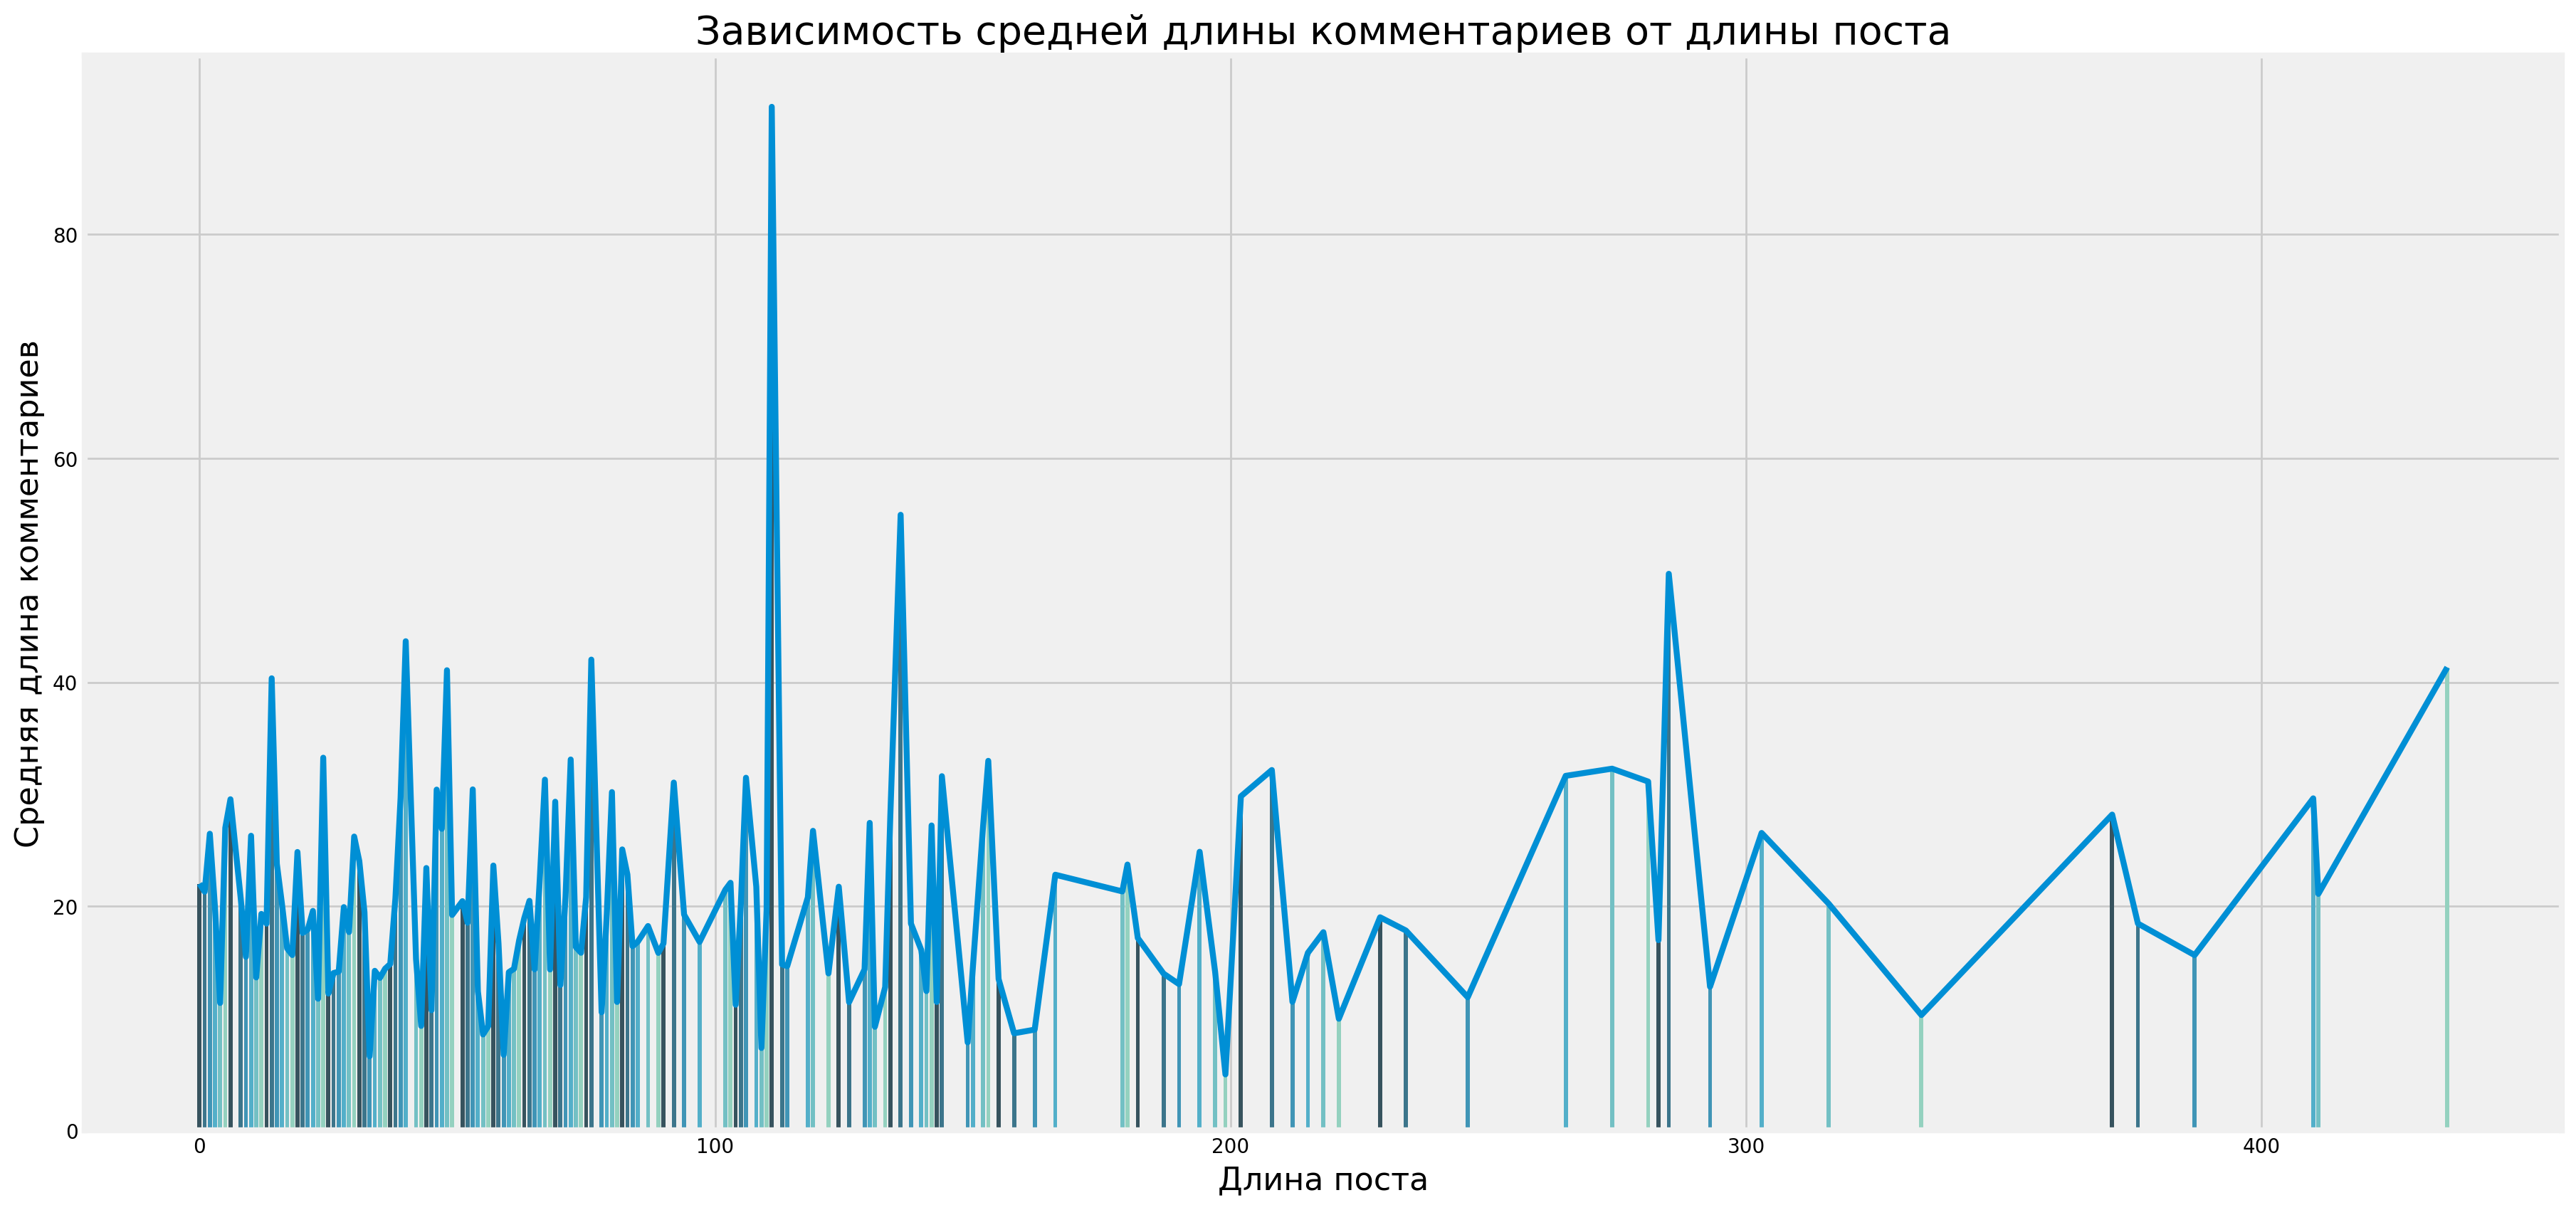

In [5]:
x = sorted(av_comment_len.keys())[:-3]
y = [av_comment_len[elem] for elem in x]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color=colors)
plt.plot(x, y,  linewidth=3)

plt.title('Зависимость средней длины комментариев от длины поста',  fontsize=20)
plt.ylabel('Средняя длина комментариев',  fontsize=16)
plt.xlabel('Длина поста',  fontsize=16)

plt.show()

При таком "приближении" графика все еще не видно какой-либо зависимости

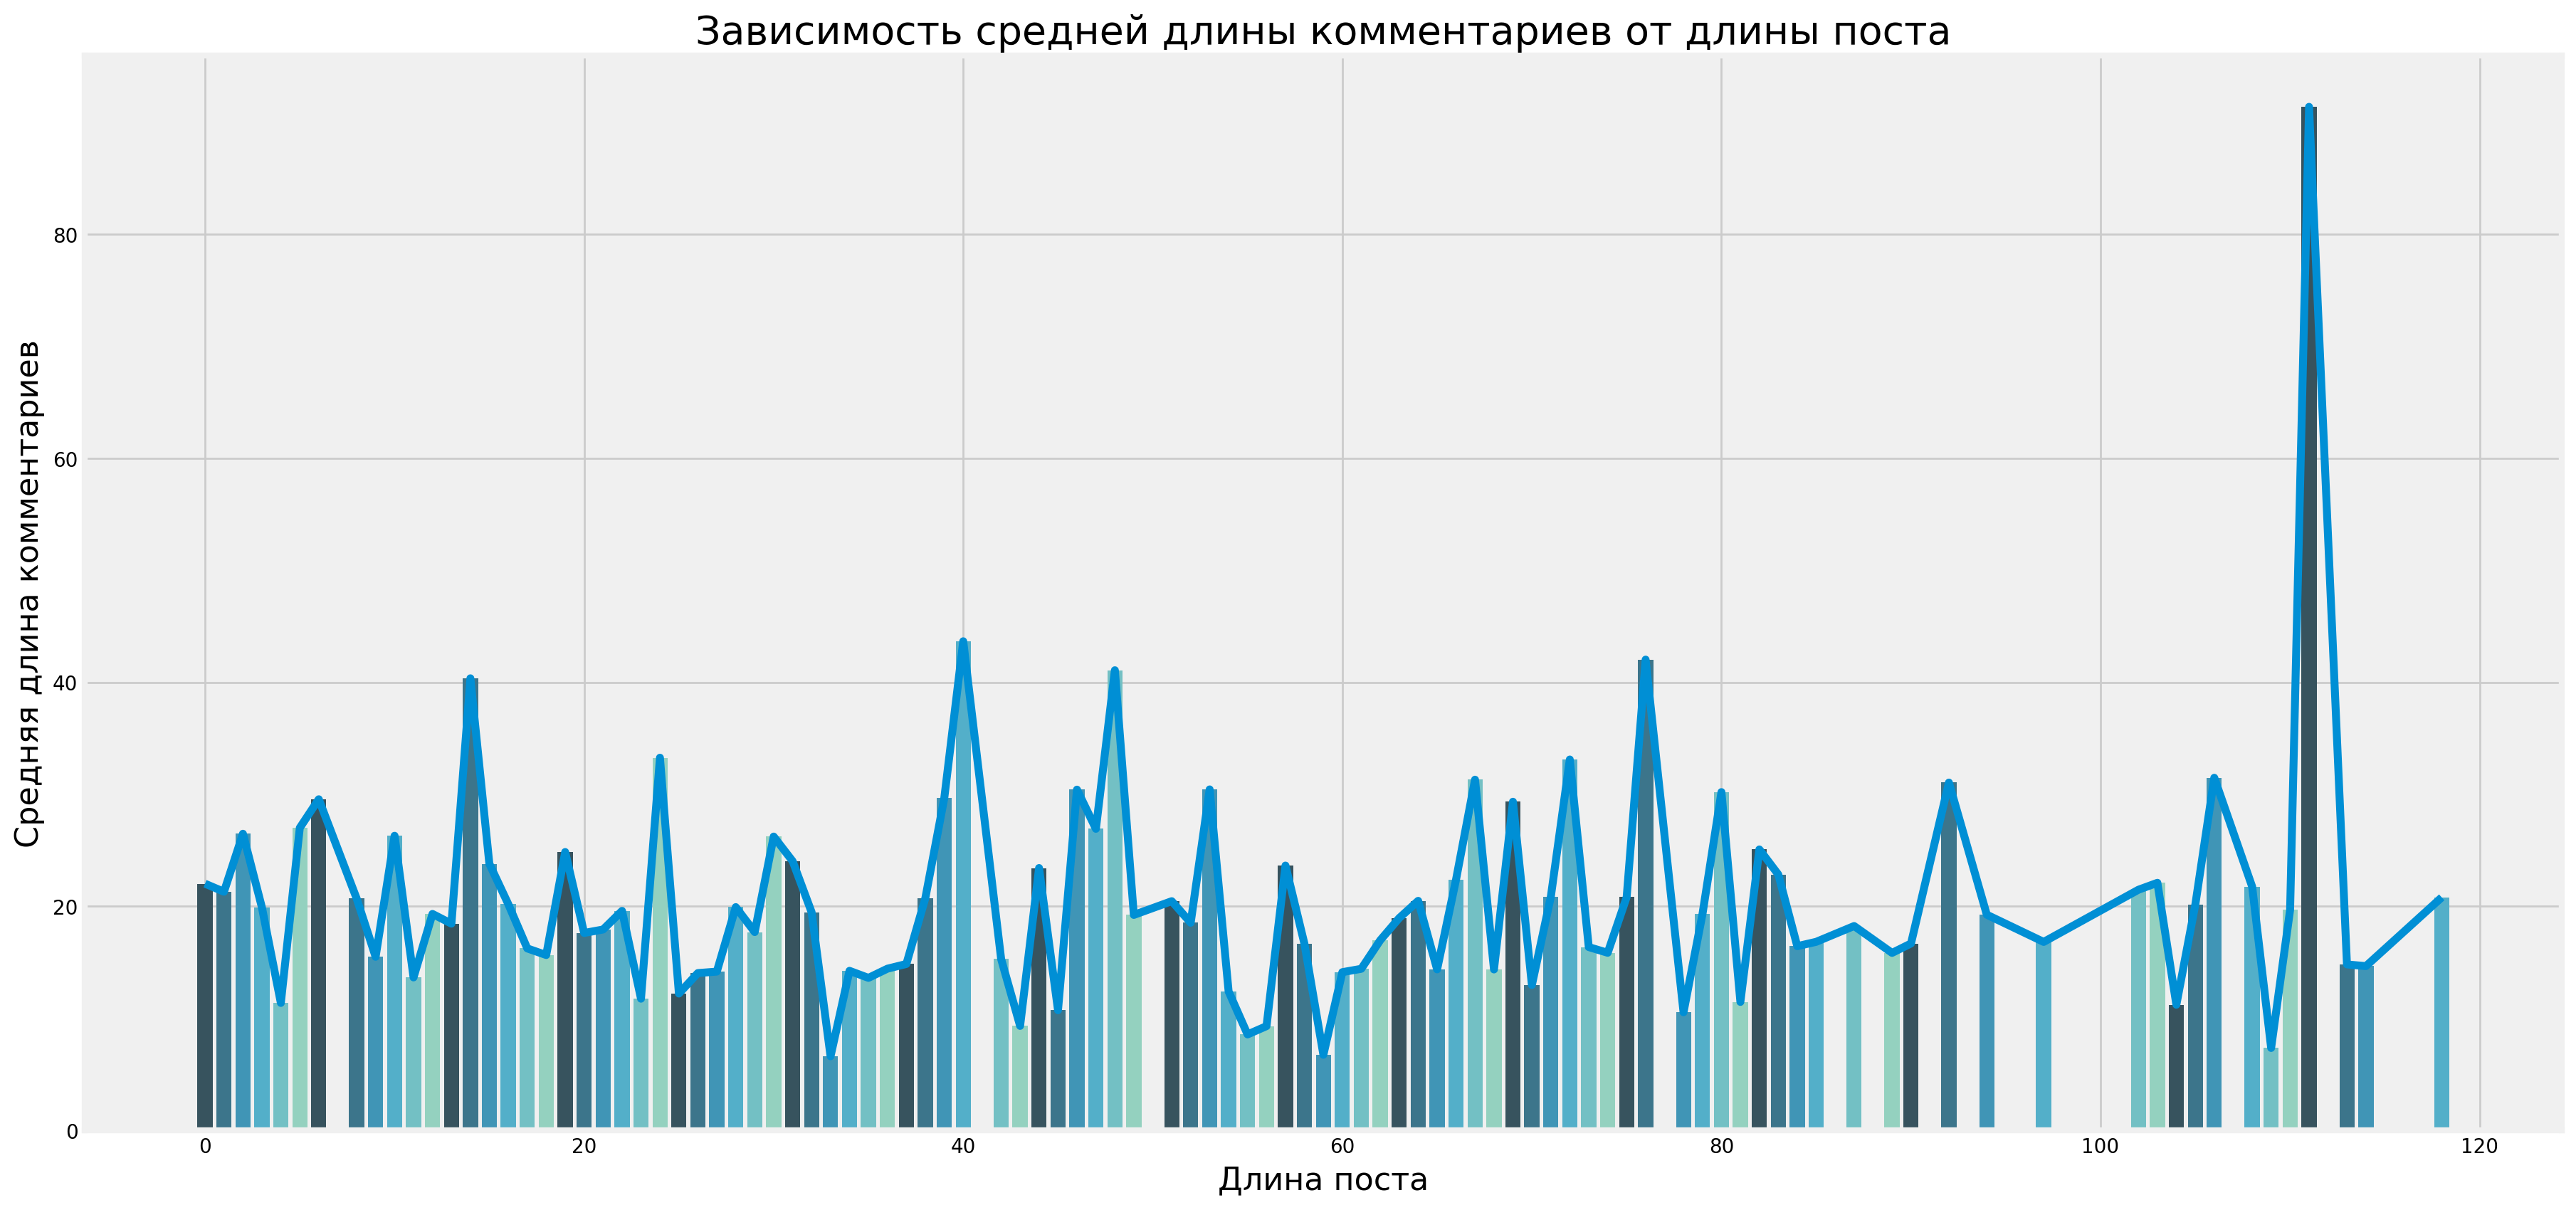

In [6]:
x = sorted(av_comment_len.keys())[:100]
y = [av_comment_len[elem] for elem in x]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color=colors)
plt.plot(x, y)

plt.title('Зависимость средней длины комментариев от длины поста',  fontsize=20)
plt.ylabel('Средняя длина комментариев',  fontsize=16)
plt.xlabel('Длина поста',  fontsize=16)

plt.show()

На первых 100 длинах все еще хаотичный разброс. Выделяется только один выброс – но, возможно, к посту такой длины написан только  один длинный комментарий.

По-видимому, длина комментария не зависит от длины поста. *(Вообще я бы посмотрела зависимость количества лайков от длины комментария, мне кажется, должно получиться интереснее. Но этого в дз нет, а дедлайн – есть)*

Теперь рассмотрим зависимость – если она есть – длины поста от месяца и от дня недели, когда он был опубликован.

In [7]:
months_lenghts = defaultdict(list)
for post in posts:
    months_lenghts[post.month].append(len(post.text.split()))

av_months_len = {}
for key, value in months_lenghts.items():
    av_months_len[key] = round(sum(value) / len(value), 2)

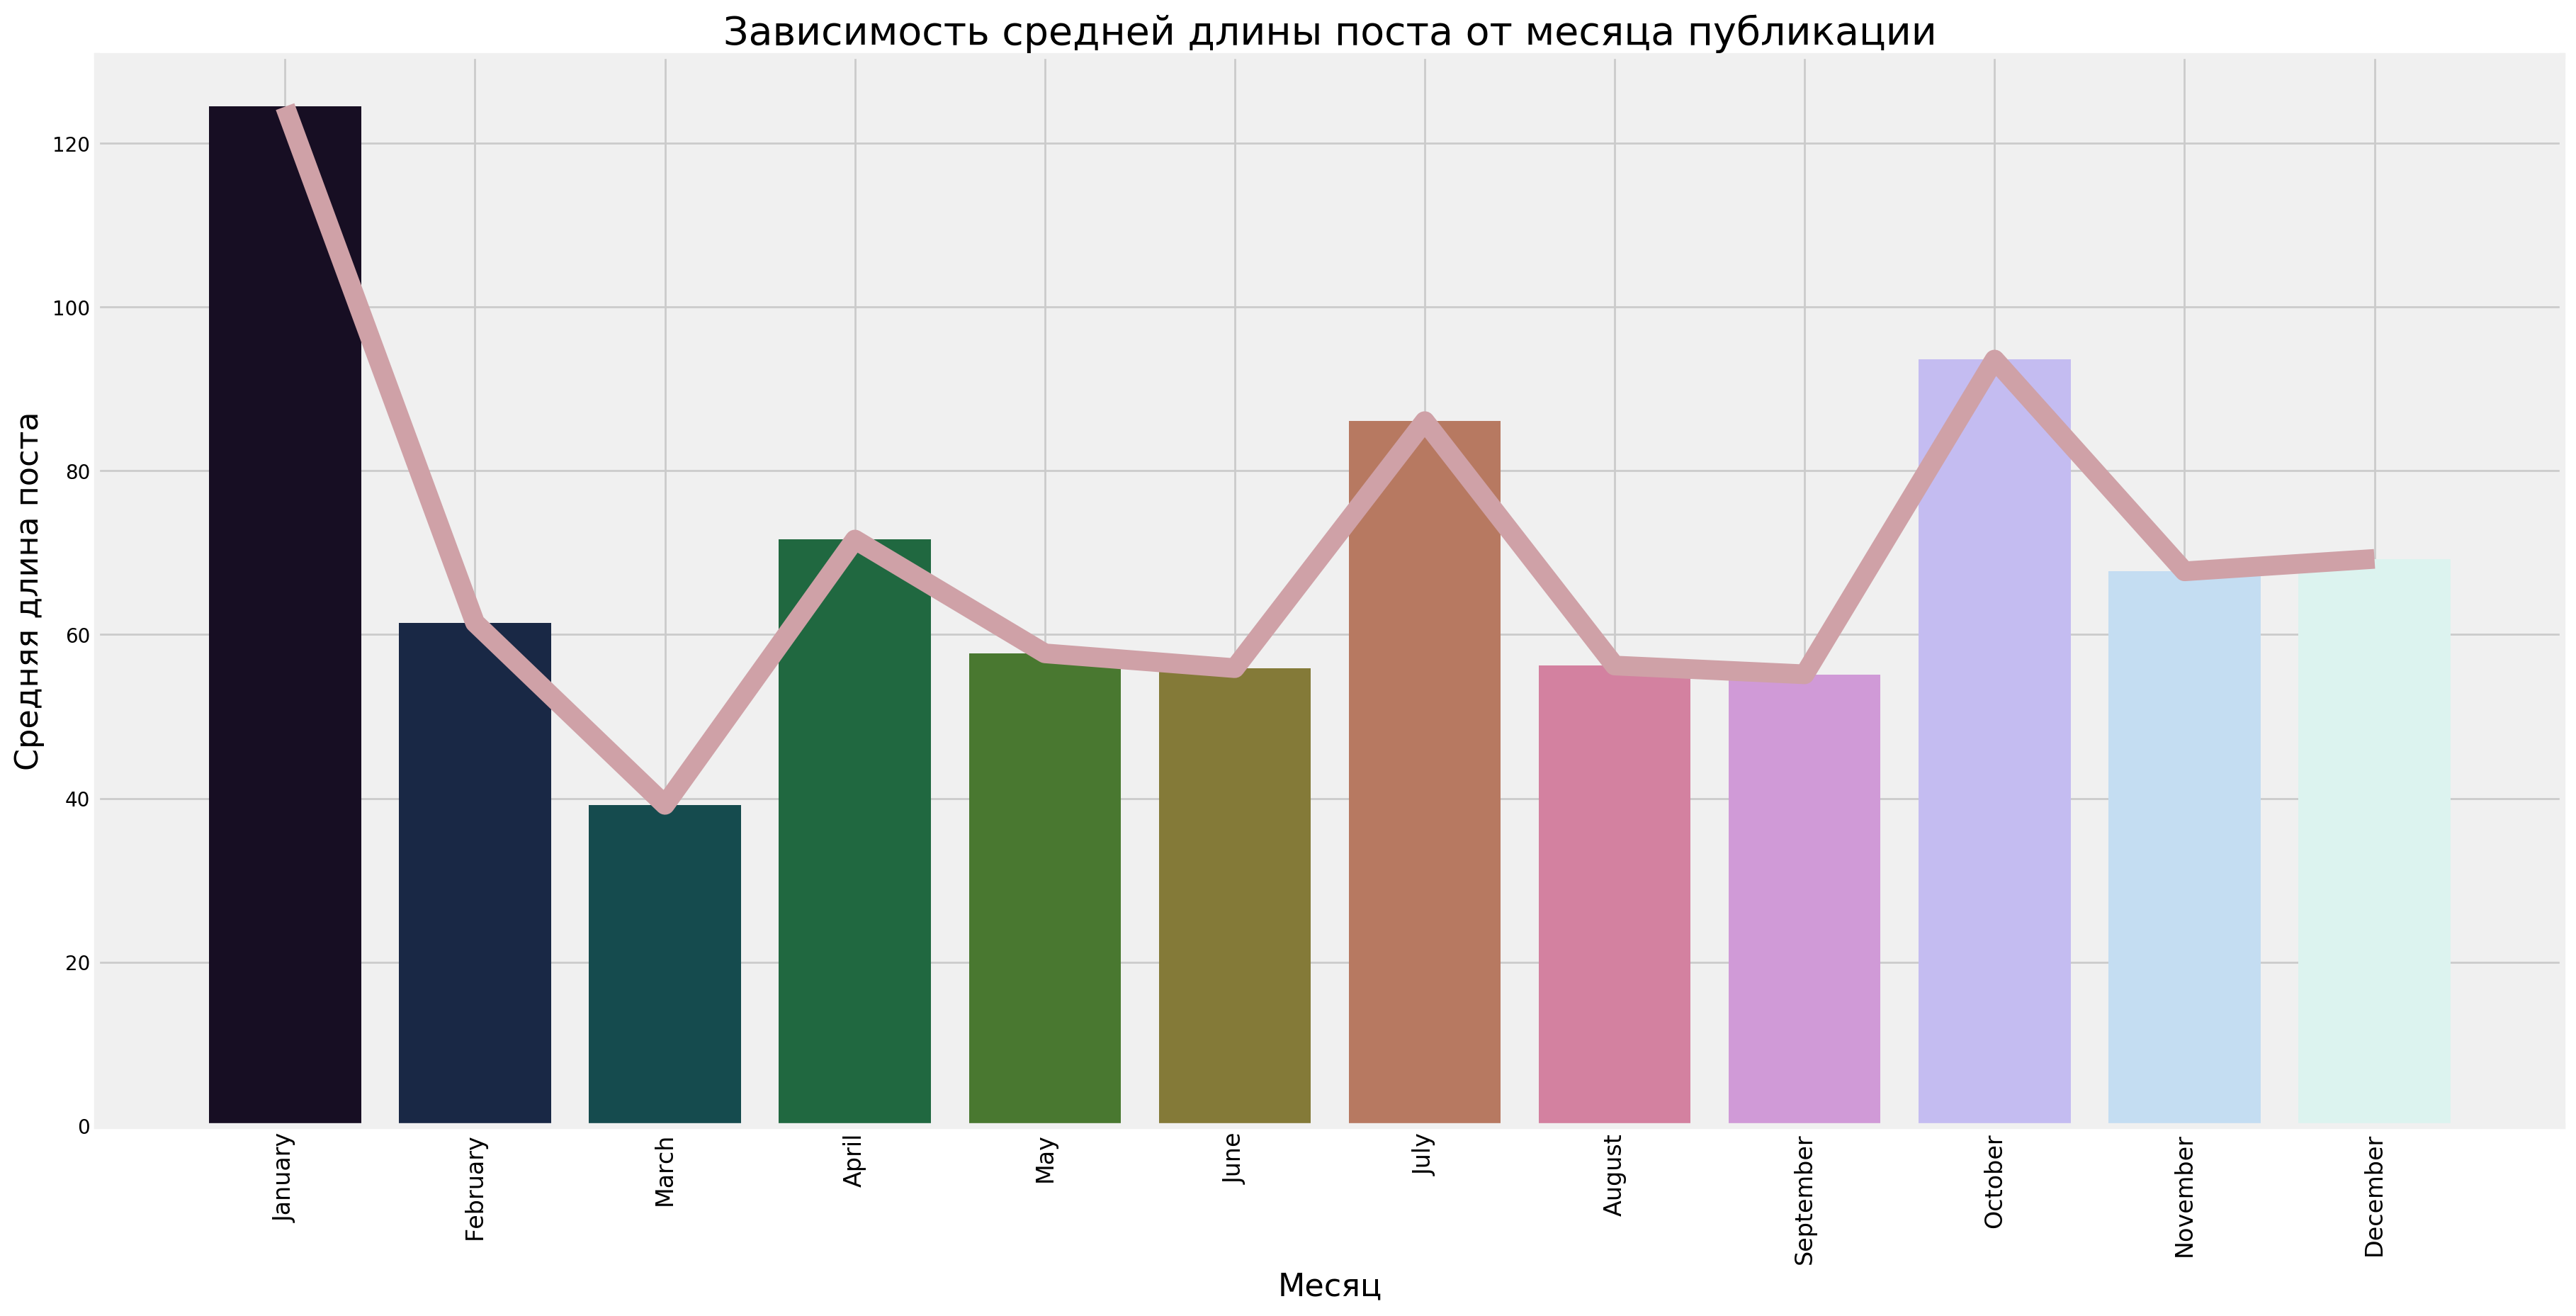

In [8]:
x = sorted(av_months_len.keys())
y = [av_months_len[elem] for elem in x]

import datetime
months_names = [datetime.date(1900, elem, 1).strftime('%B') for elem in x]

colors = sns.color_palette('cubehelix', 12)

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color=colors)
plt.plot(x, y, linewidth=10, color='#cfa1a7')

plt.title('Зависимость средней длины поста от месяца публикации',  fontsize=20)
plt.ylabel('Средняя длина поста',  fontsize=16)
plt.xlabel('Месяц',  fontsize=16)
plt.xticks(x, months_names, rotation=90, fontsize=12)

plt.show()

На графике виден пик в январе и три пика поменьше: в апреле, июле и октябре. Все эти месяцы – середины времен года, каждые три месяца появляется пик. Я исследовала паблик геймдев компании Ice-Pick Lodge. Видимо, четыре раза в год у них проходят крупные ревью (главный – в январе) и они пишут в группу длинные подробные анонсы и новости, а в "межсезонье" поддерживают активность небольшими постами (как, например, [этот](https://vk.com/wall-33165854_27536)).

*А цвет каждого месяца символизирует погоду в него, теплота месяца – теплота цвета. Хотя cubehelix конечно и не для этого*

In [9]:
weekdays_lenghts = defaultdict(list)
for post in posts:
    weekdays_lenghts[post.weekday].append(len(post.text.split()))

av_weekdays_len = {}
for key, value in weekdays_lenghts.items():
    av_weekdays_len[key] = round(sum(value) / len(value), 2)

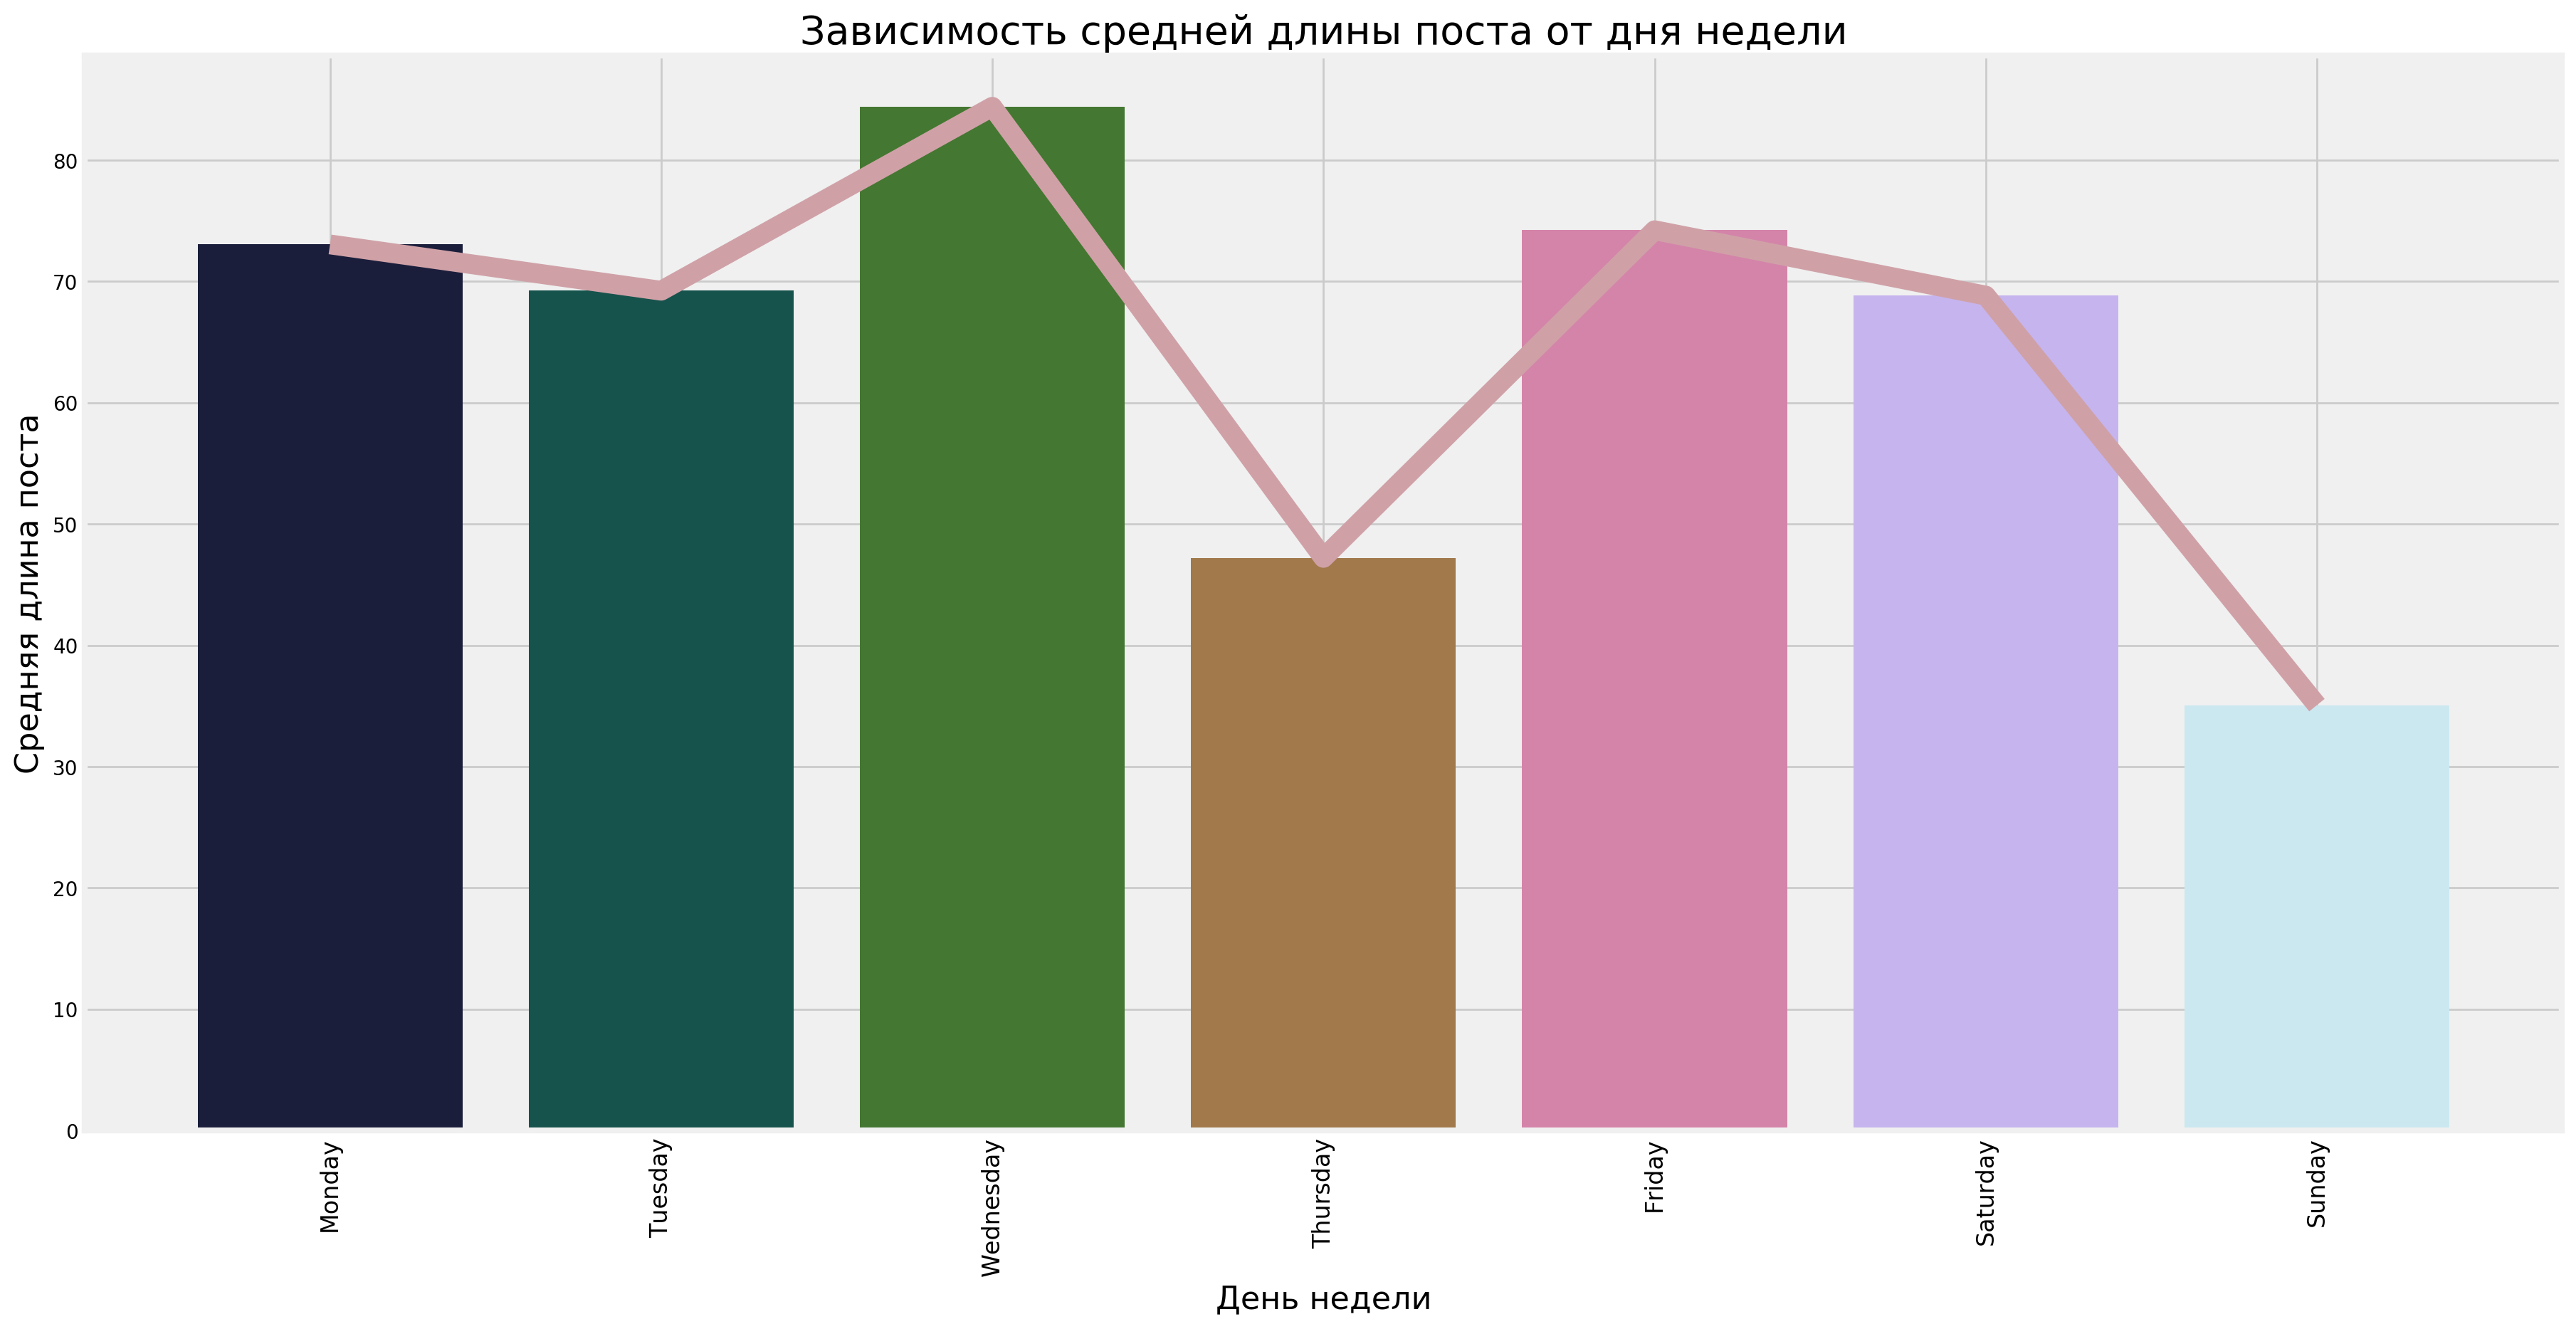

In [10]:
x = sorted(av_weekdays_len.keys())
y = [av_weekdays_len[elem] for elem in x]

colors = sns.color_palette('cubehelix', 7)

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
            'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color=colors)
plt.plot(x, y, linewidth=10, color='#cfa1a7')

plt.title('Зависимость средней длины поста от дня недели',  fontsize=20)
plt.ylabel('Средняя длина поста',  fontsize=16)
plt.xlabel('День недели',  fontsize=16)
plt.xticks(x, weekdays, rotation=90, fontsize=12)

plt.show()

График "проседает" в четверг и воскресенье. У меня так и не получилось придумать, почему это может быть – особенно с учетом того, что в большинстве пабликов посты часто пишутся заранее и кладутся в отложку. Т.е. это даже не "в четверг и воскресенье пишут посты короче", а "в четверг и воскресенье публикуют посты короче".

Теперь посмотрим на среднюю длину комментария пользователя в зависимости от его пола и наличия аватарки. Я выбрала эти параметры, т.к. дата рождения, город, о себе и т.д. может быть не указано, а пол – нет.

In [11]:
import tqdm

comments_by_user = defaultdict(list)

for post in tqdm.tqdm(posts[:110]):
    for comment in post.comments:
        # there are comments from communities
        if comment.author_id > 0:
            comments_by_user[comment.author].append(len(comment.text.split()))

av_comm_by_user = {}
        
for key, value in comments_by_user.items():
    av_comm_by_user[key] = sum(value) / len(value)

100%|████████████████████████████████████████| 110/110 [48:46<00:00, 29.31s/it]


In [12]:
sex = {1: 'female', 2: 'male'}
has_photo = {0: 'no photo', 1: 'has photo'}

comments_by_sex = {1: [], 2: []}
comments_by_photo = {0: [], 1: []}

for key, value in av_comm_by_user.items():
    comments_by_sex[key.sex].append(value)
    comments_by_photo[key.has_photo].append(value)

av_sex_comment_length = {1: sum(comments_by_sex[1]) / len(comments_by_sex[1]),
                         2: sum(comments_by_sex[2]) / len(comments_by_sex[2])}
av_photo_comment_length = {0: sum(comments_by_photo[0]) / len(comments_by_photo[0]), 
                           1: sum(comments_by_photo[1]) / len(comments_by_photo[1])}

In [13]:
av_sex_comment_length

{1: 29.989718614718615, 2: 26.99250730994152}

In [14]:
av_photo_comment_length

{0: 30.27121212121212, 1: 27.49924924924925}

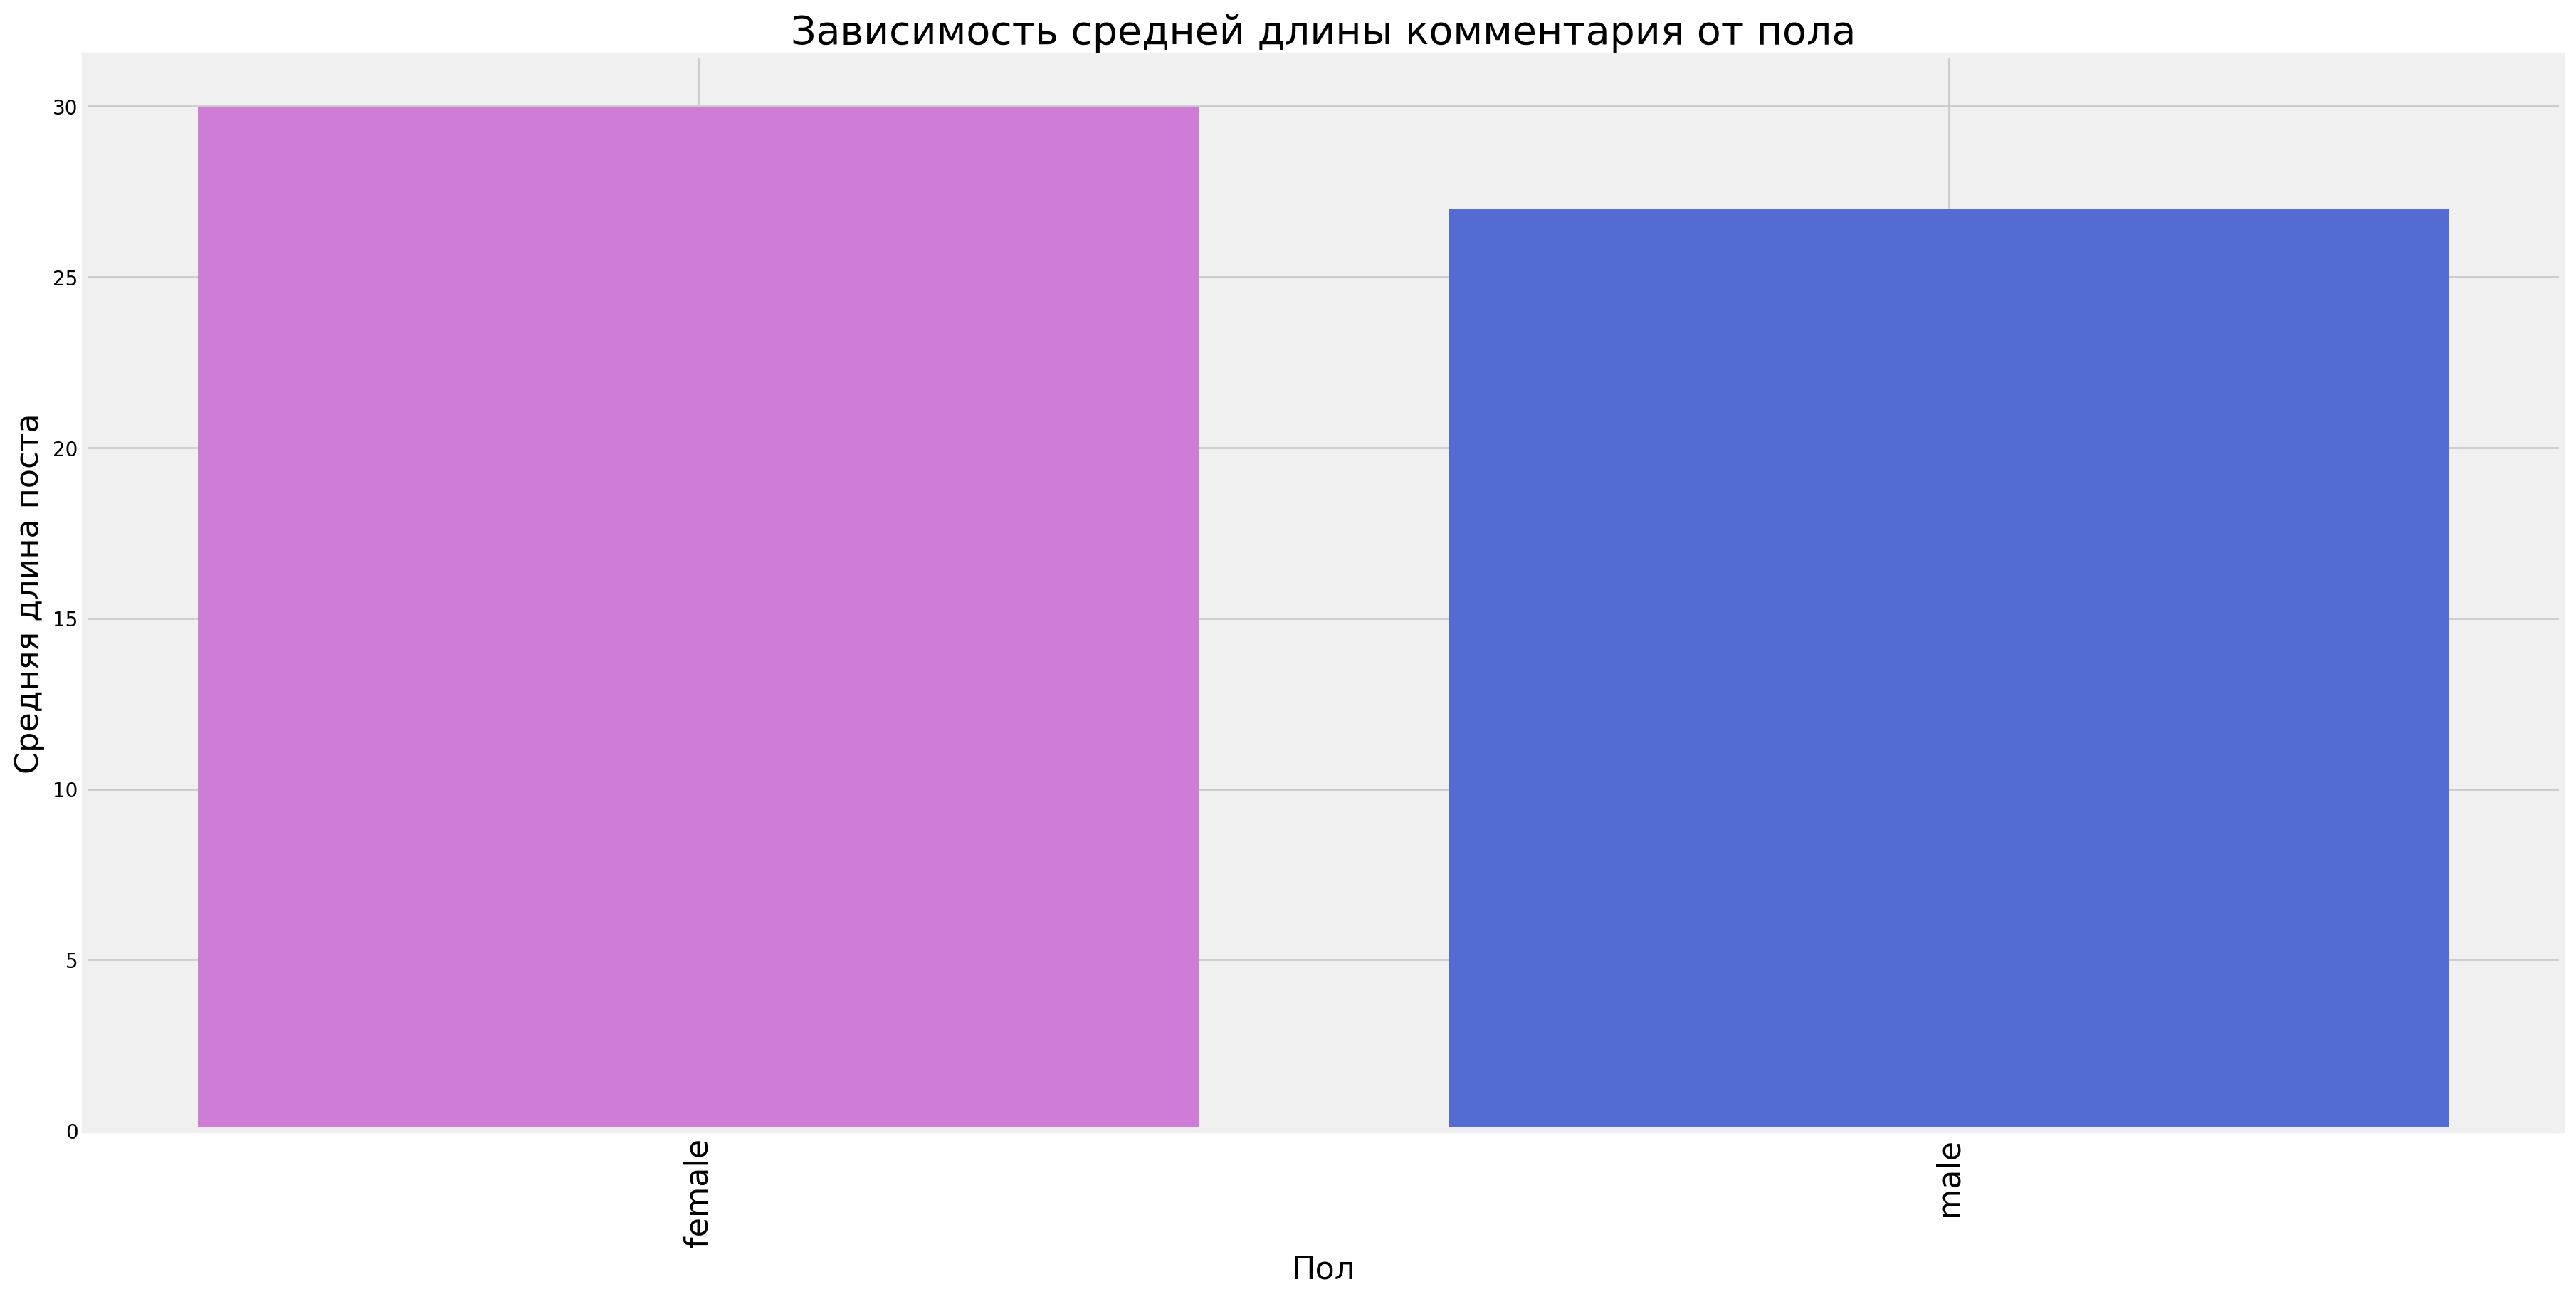

In [15]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(list(av_sex_comment_length.keys()), list(av_sex_comment_length.values()),
       color=['#cf7cd6', '#546bd4'])

plt.title('Зависимость средней длины комментария от пола',  fontsize=20)
plt.ylabel('Средняя длина поста',  fontsize=16)
plt.xlabel('Пол',  fontsize=16)
plt.xticks(list(av_sex_comment_length.keys()), sex.values(), rotation=90, fontsize=16)

plt.show()

Девушки в среднем пишут комментарии длиннее, но незначительно: на 3 символа.

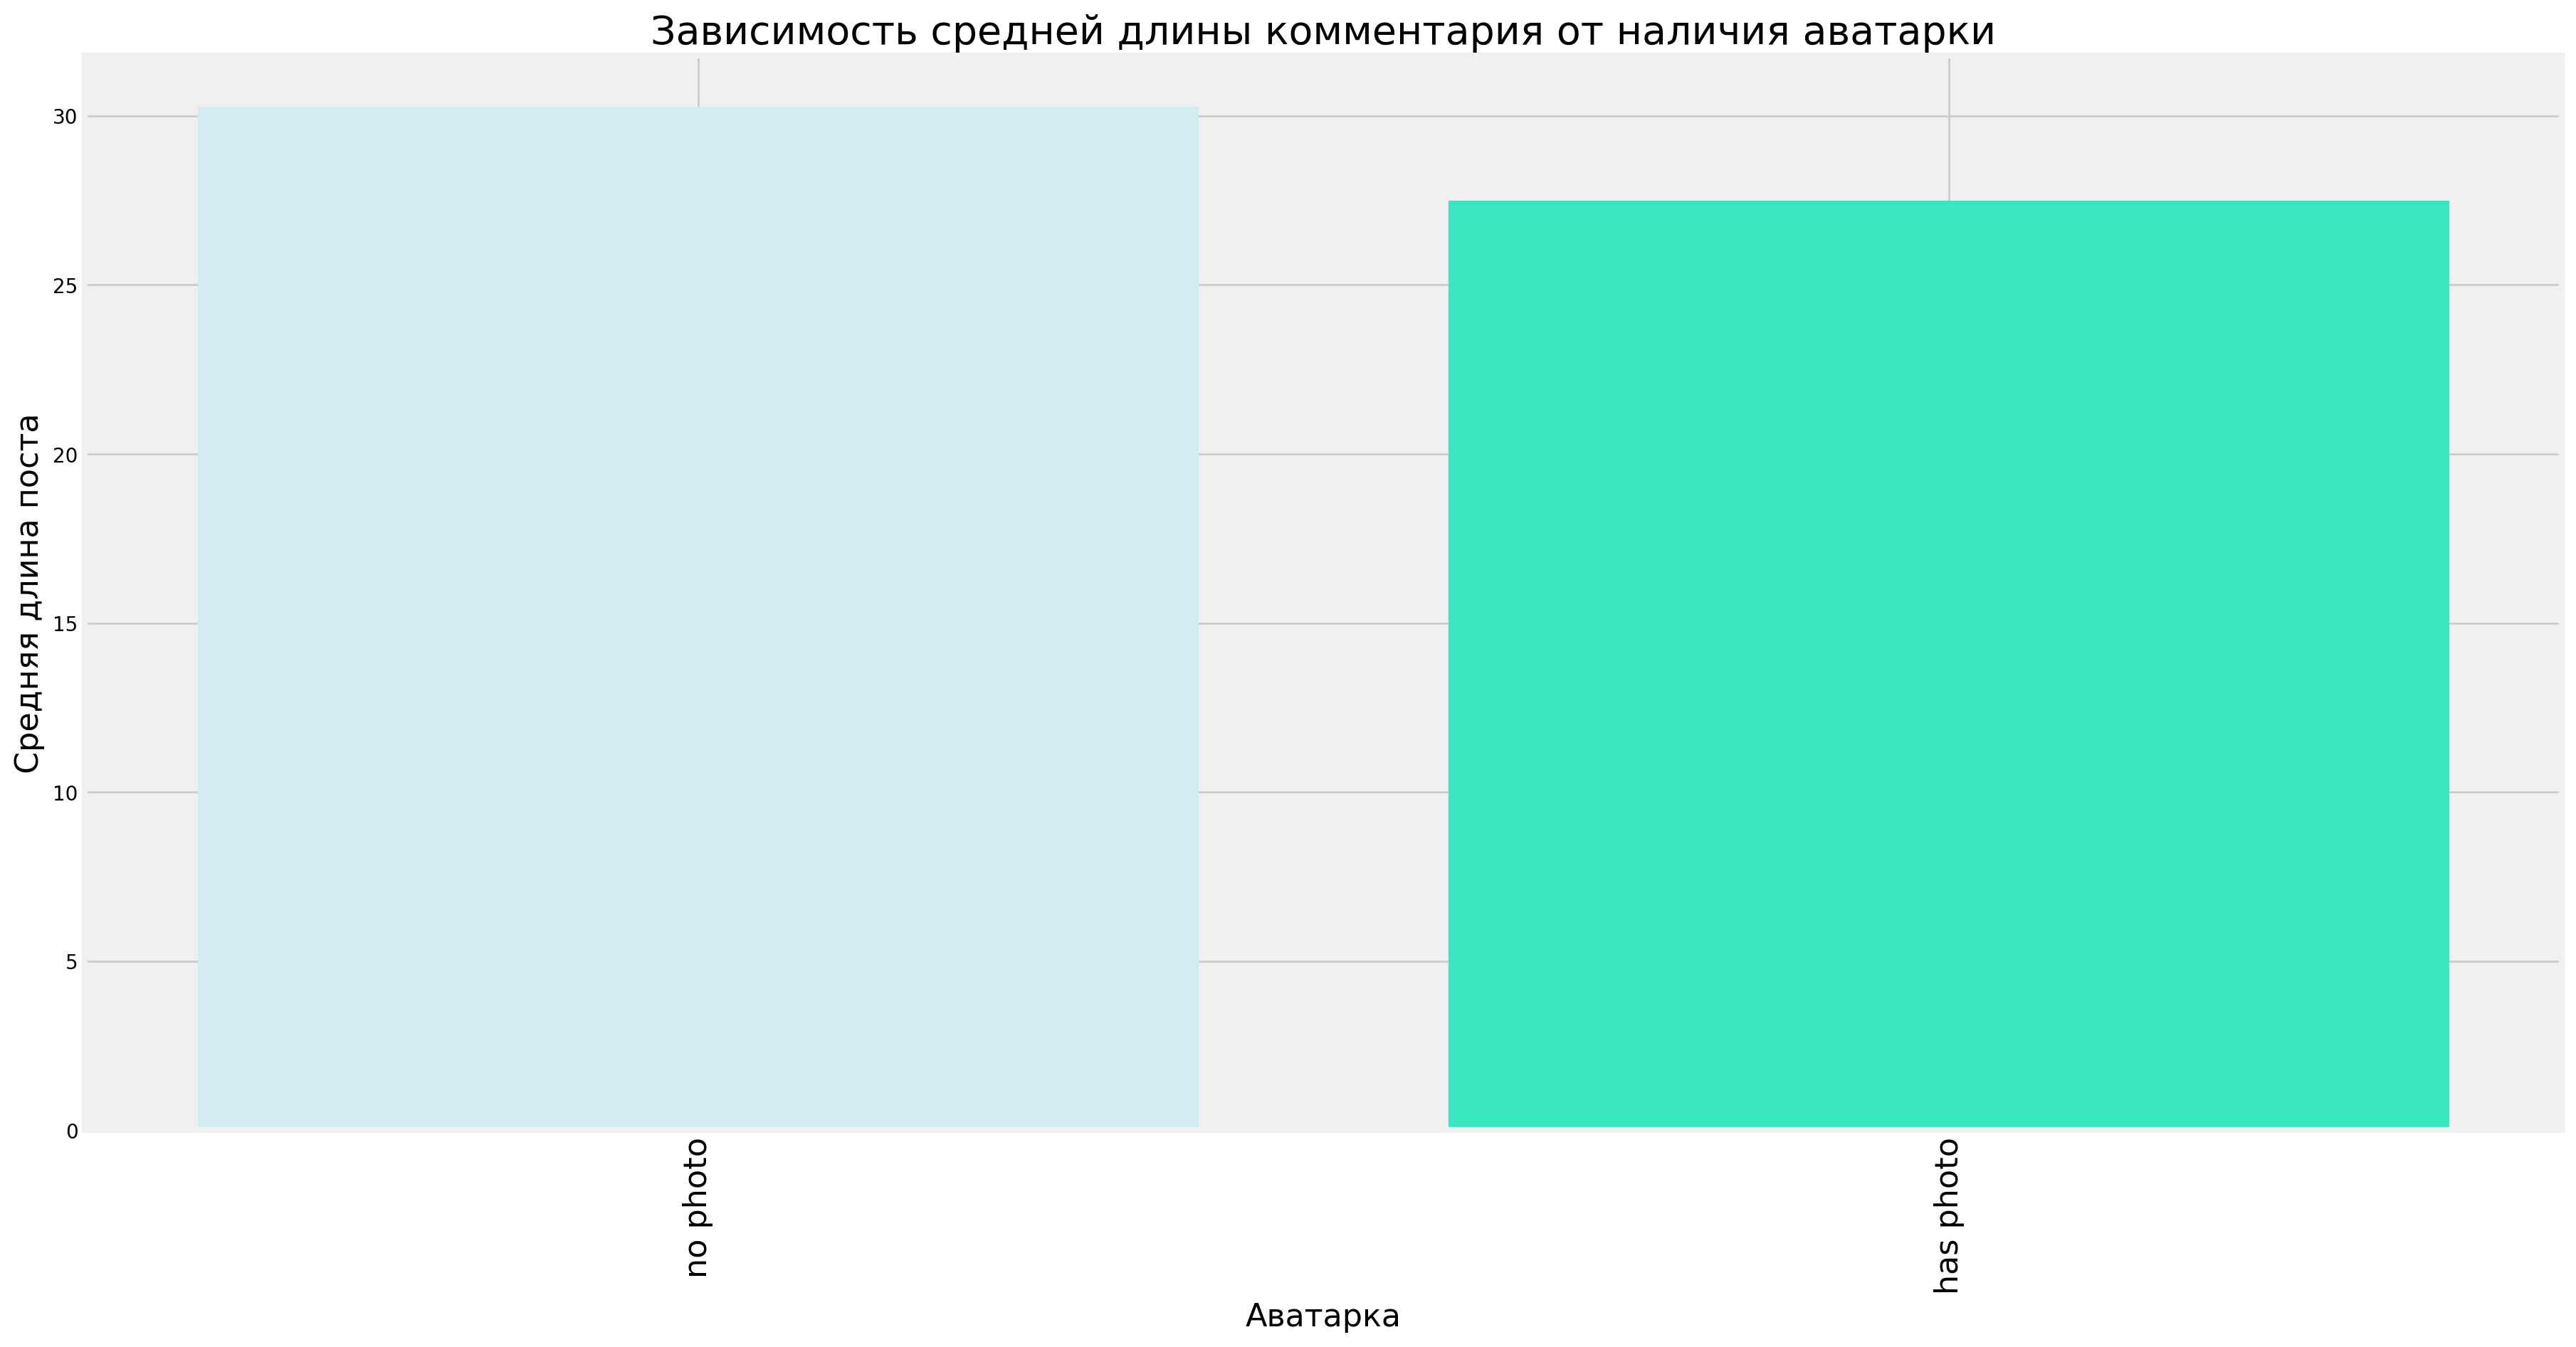

In [16]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(list(av_photo_comment_length.keys()), list(av_photo_comment_length.values()),
       color=['#d1edf0', '#39e6c0'])

plt.title('Зависимость средней длины комментария от наличия аватарки',  fontsize=20)
plt.ylabel('Средняя длина поста',  fontsize=16)
plt.xlabel('Аватарка',  fontsize=16)
plt.xticks(list(av_photo_comment_length.keys()), has_photo.values(), rotation=90, fontsize=16)

plt.show()

Аналогично: разница примерно в 3 символа.

Теперь частотность слов.

In [17]:
with open('lemmatized.txt', 'r', encoding='utf-8') as lemm_file:
    lemm = lemm_file.read()

with open('plain.txt', 'r', encoding='utf-8') as pl_file:
    plain = pl_file.read()

In [18]:
import re
from collections import Counter

# - in words won't be removed
plain = re.sub(r'(?:[^\w\s\n-]|\s-)', '', plain.lower(), flags=re.U)
lemm = re.sub(r'(?:[^\w\s\n-]|\s-)', '', lemm.lower(), flags=re.U)

plain_freq = Counter(plain.split()).most_common()
lemm_freq = Counter(lemm.split()).most_common()

In [19]:
from nltk.corpus import stopwords

ru_stopwords = stopwords.words('russian')

def remove_stopwords(text, sw=ru_stopwords):
    tokens = text.split()
    tokens = [token for token in tokens if token not in ru_stopwords]
    return tokens

plain_freq_wout_stopwords = Counter(remove_stopwords(plain)).most_common()
lemm_freq_wout_stopwords = Counter(remove_stopwords(lemm)).most_common()

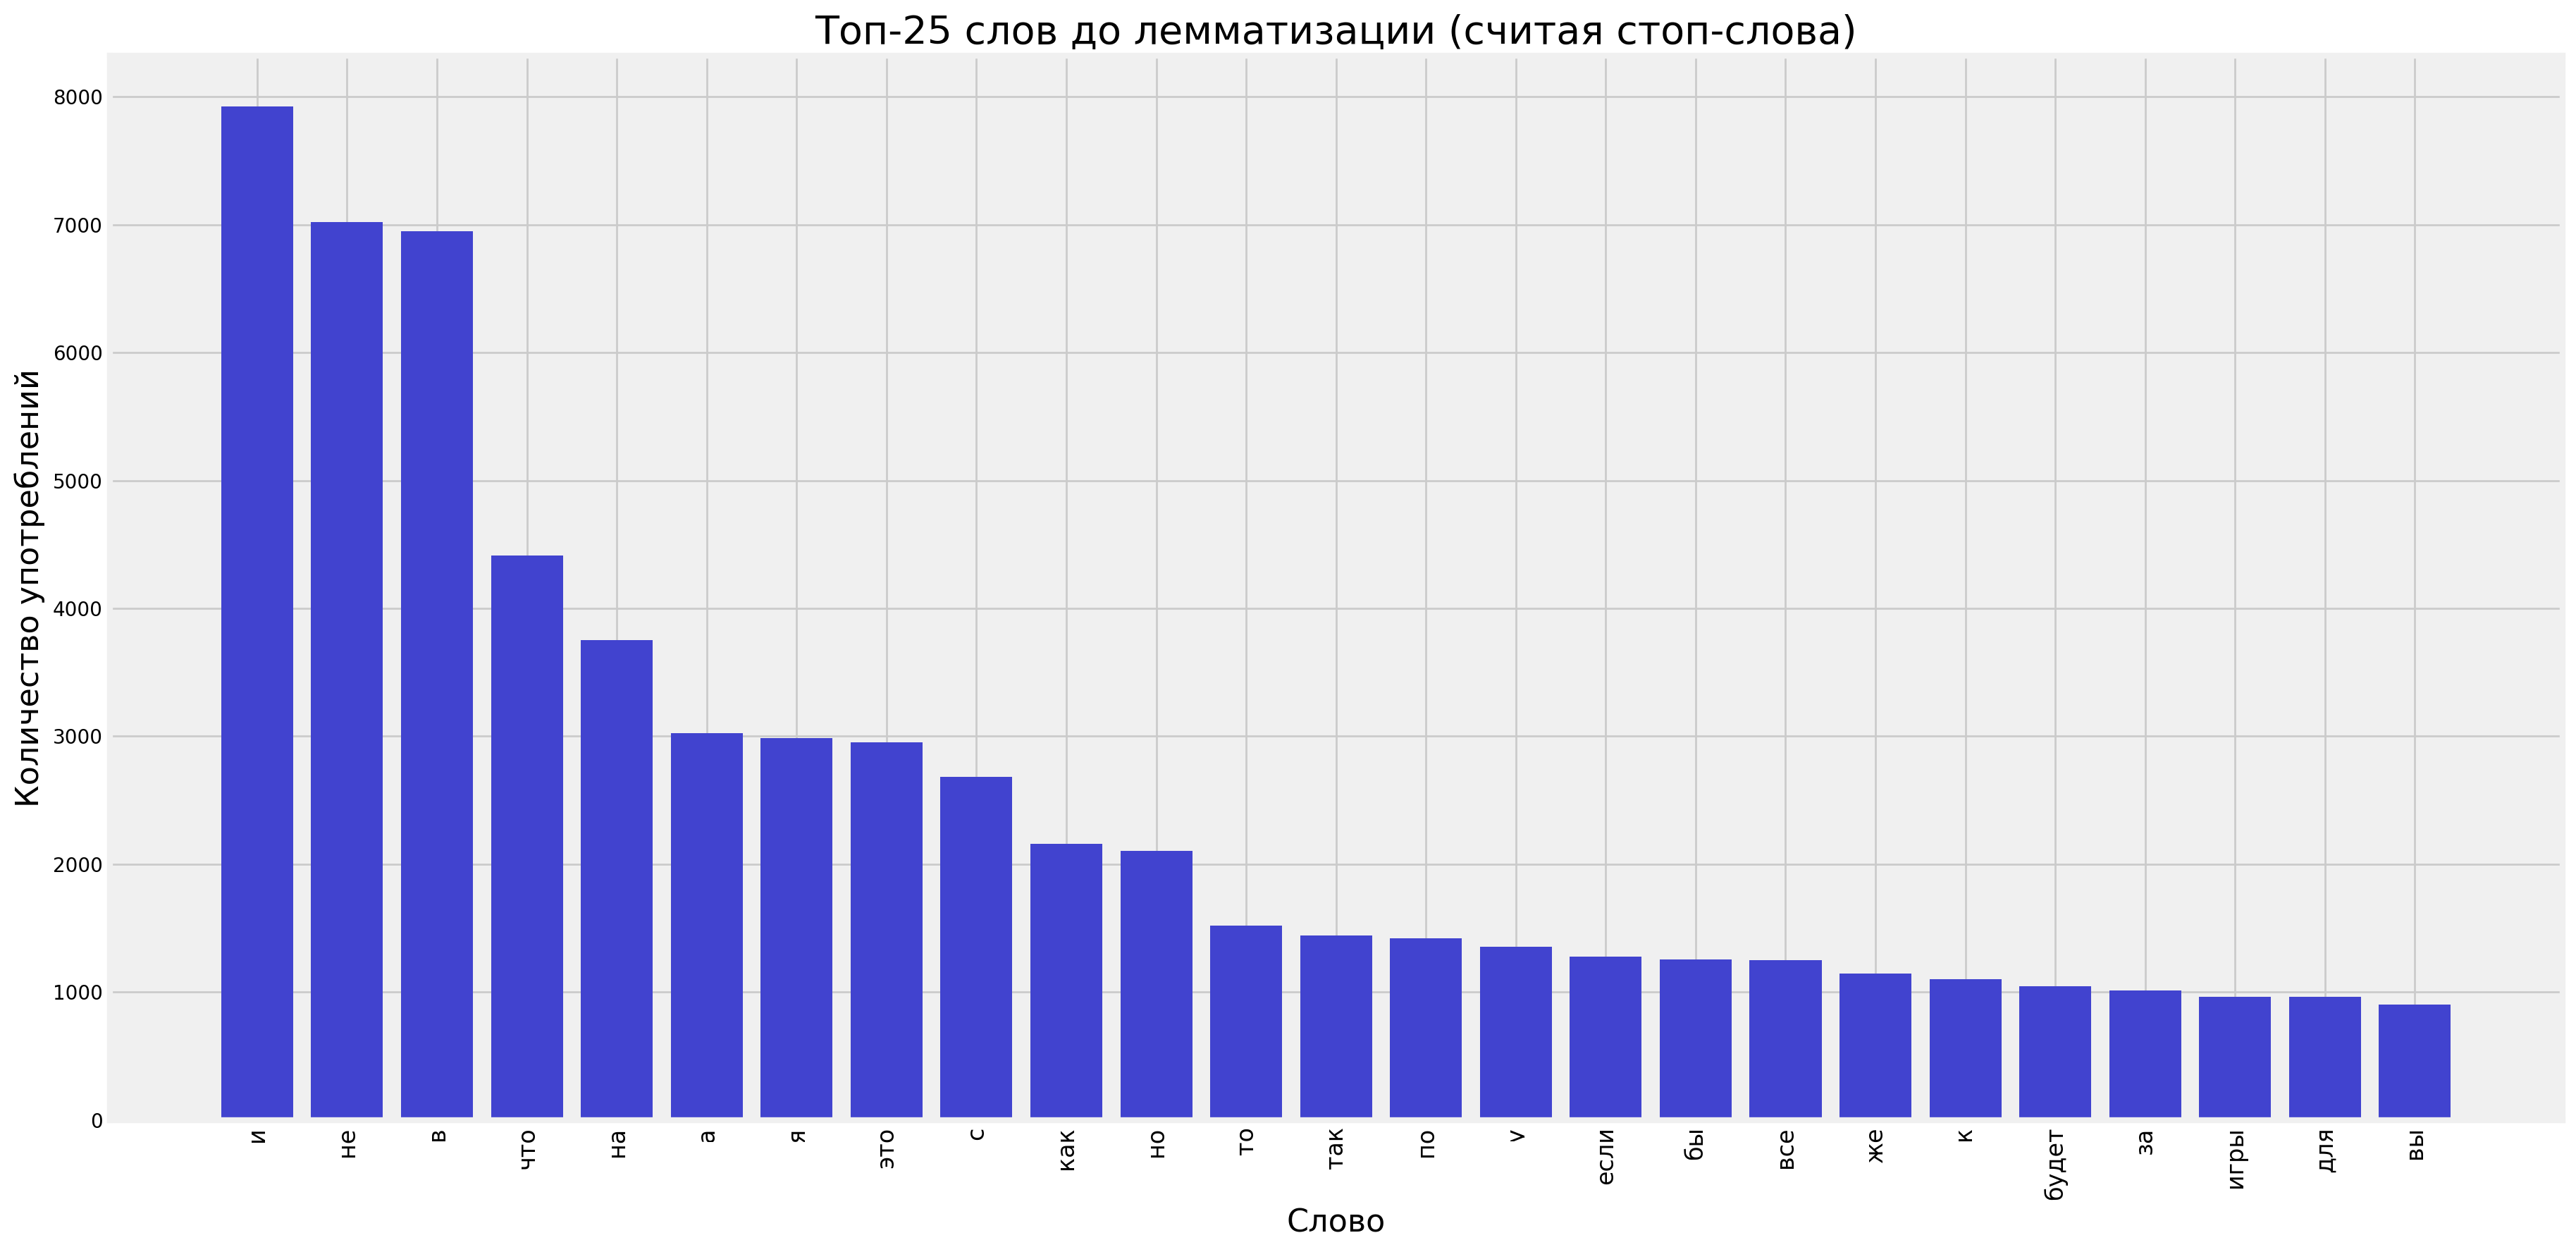

In [28]:
xlabel = [elem[0] for elem in plain_freq[:25]]
x = range(25)
y = [elem[1] for elem in plain_freq[:25]]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color='#4143cf')

plt.title('Топ-25 слов до лемматизации (считая стоп-слова)',  fontsize=20)
plt.ylabel('Количество употреблений',  fontsize=16)
plt.xlabel('Слово',  fontsize=16)
plt.xticks(x, xlabel, rotation=90, fontsize=12)

plt.show()

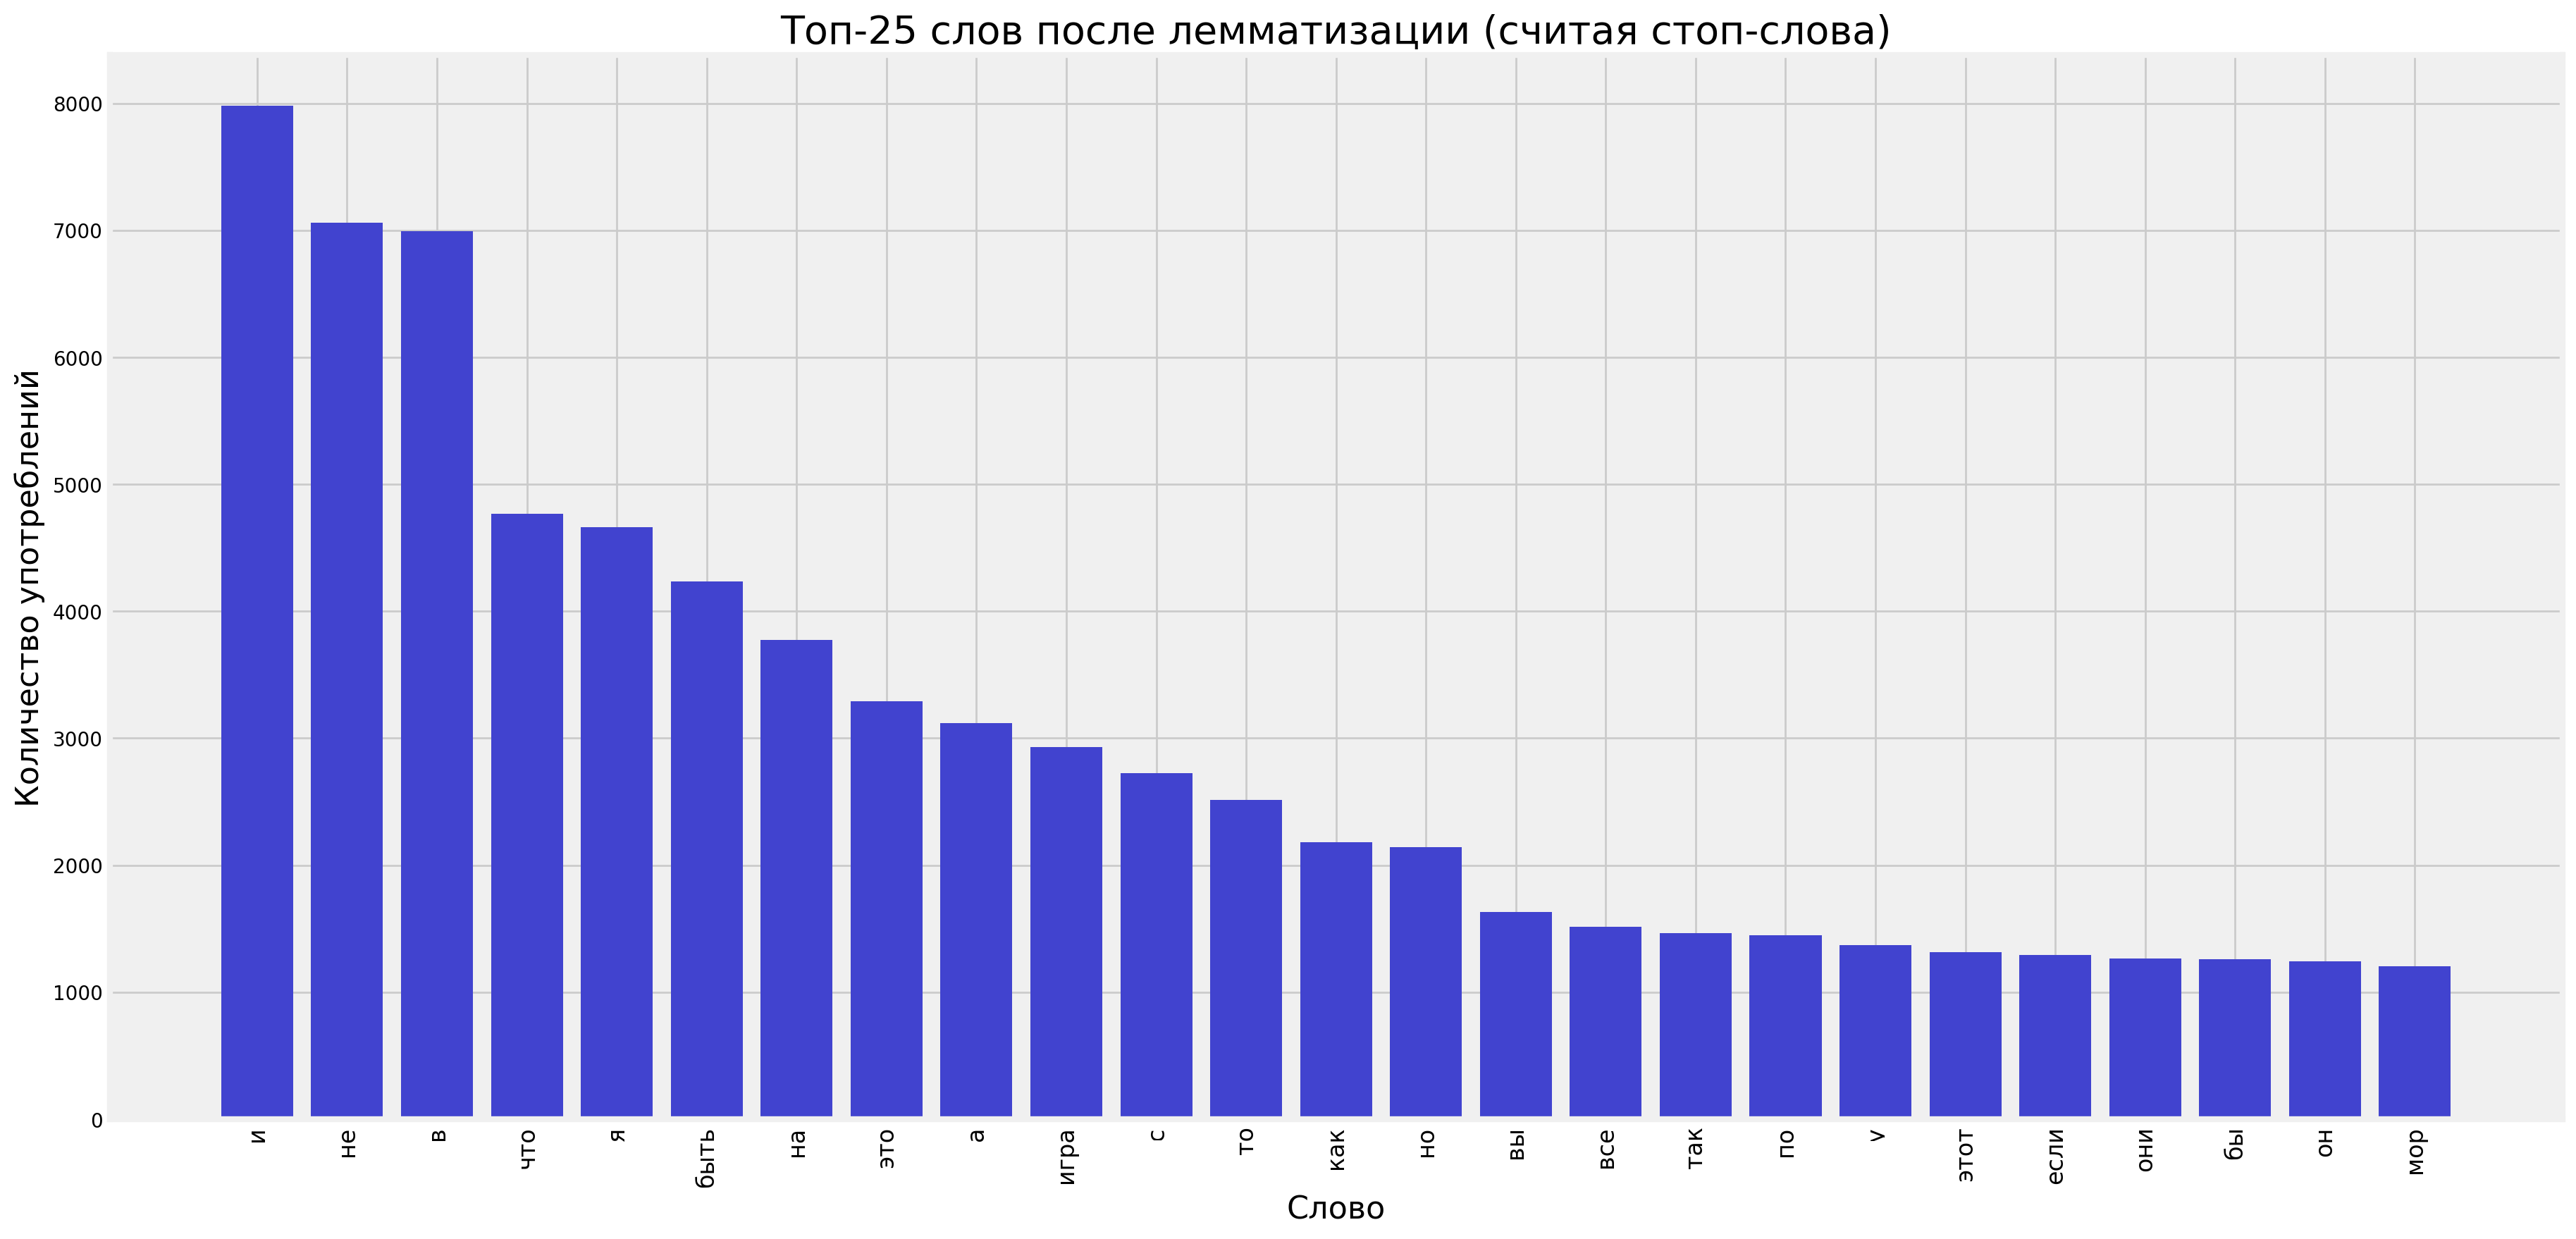

In [30]:
xlabel = [elem[0] for elem in lemm_freq[:25]]
x = range(25)
y = [elem[1] for elem in lemm_freq[:25]]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color='#4143cf')

plt.title('Топ-25 слов после лемматизации (считая стоп-слова)',  fontsize=20)
plt.ylabel('Количество употреблений',  fontsize=16)
plt.xlabel('Слово',  fontsize=16)
plt.xticks(x, xlabel, rotation=90, fontsize=12)

plt.show()

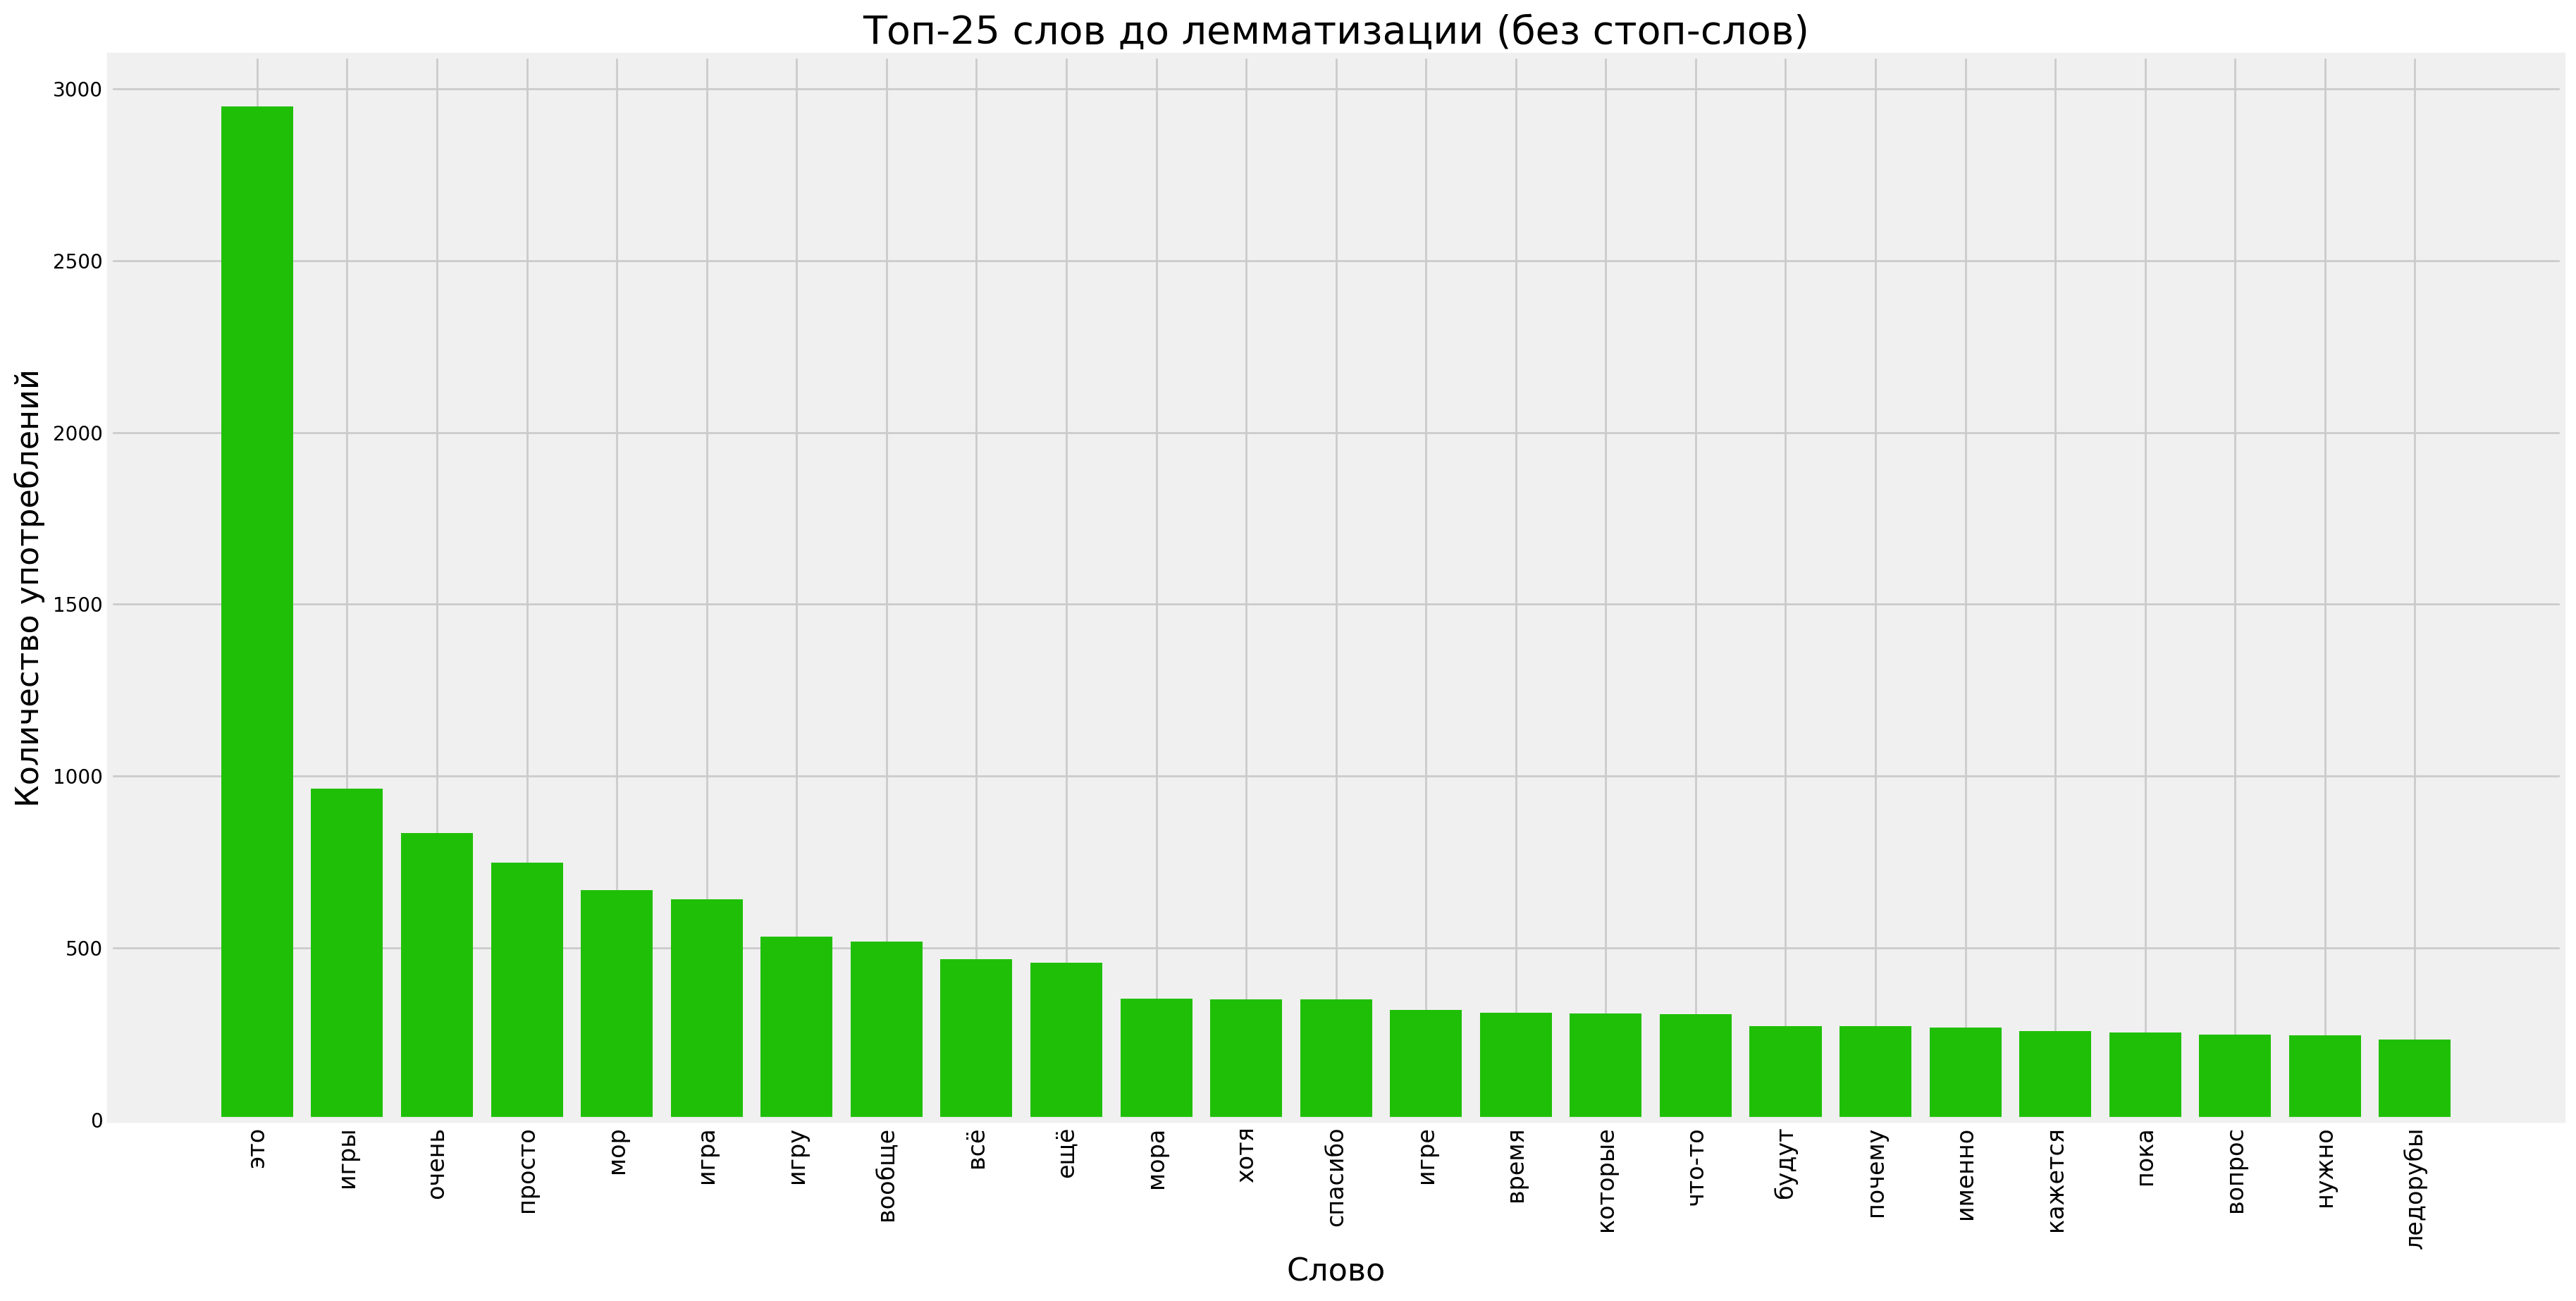

In [32]:
xlabel = [elem[0] for elem in plain_freq_wout_stopwords[:25]]
x = range(25)
y = [elem[1] for elem in plain_freq_wout_stopwords[:25]]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color='#20bf07')

plt.title('Топ-25 слов до лемматизации (без стоп-слов)',  fontsize=20)
plt.ylabel('Количество употреблений',  fontsize=16)
plt.xlabel('Слово',  fontsize=16)
plt.xticks(x, xlabel, rotation=90, fontsize=12)

plt.show()

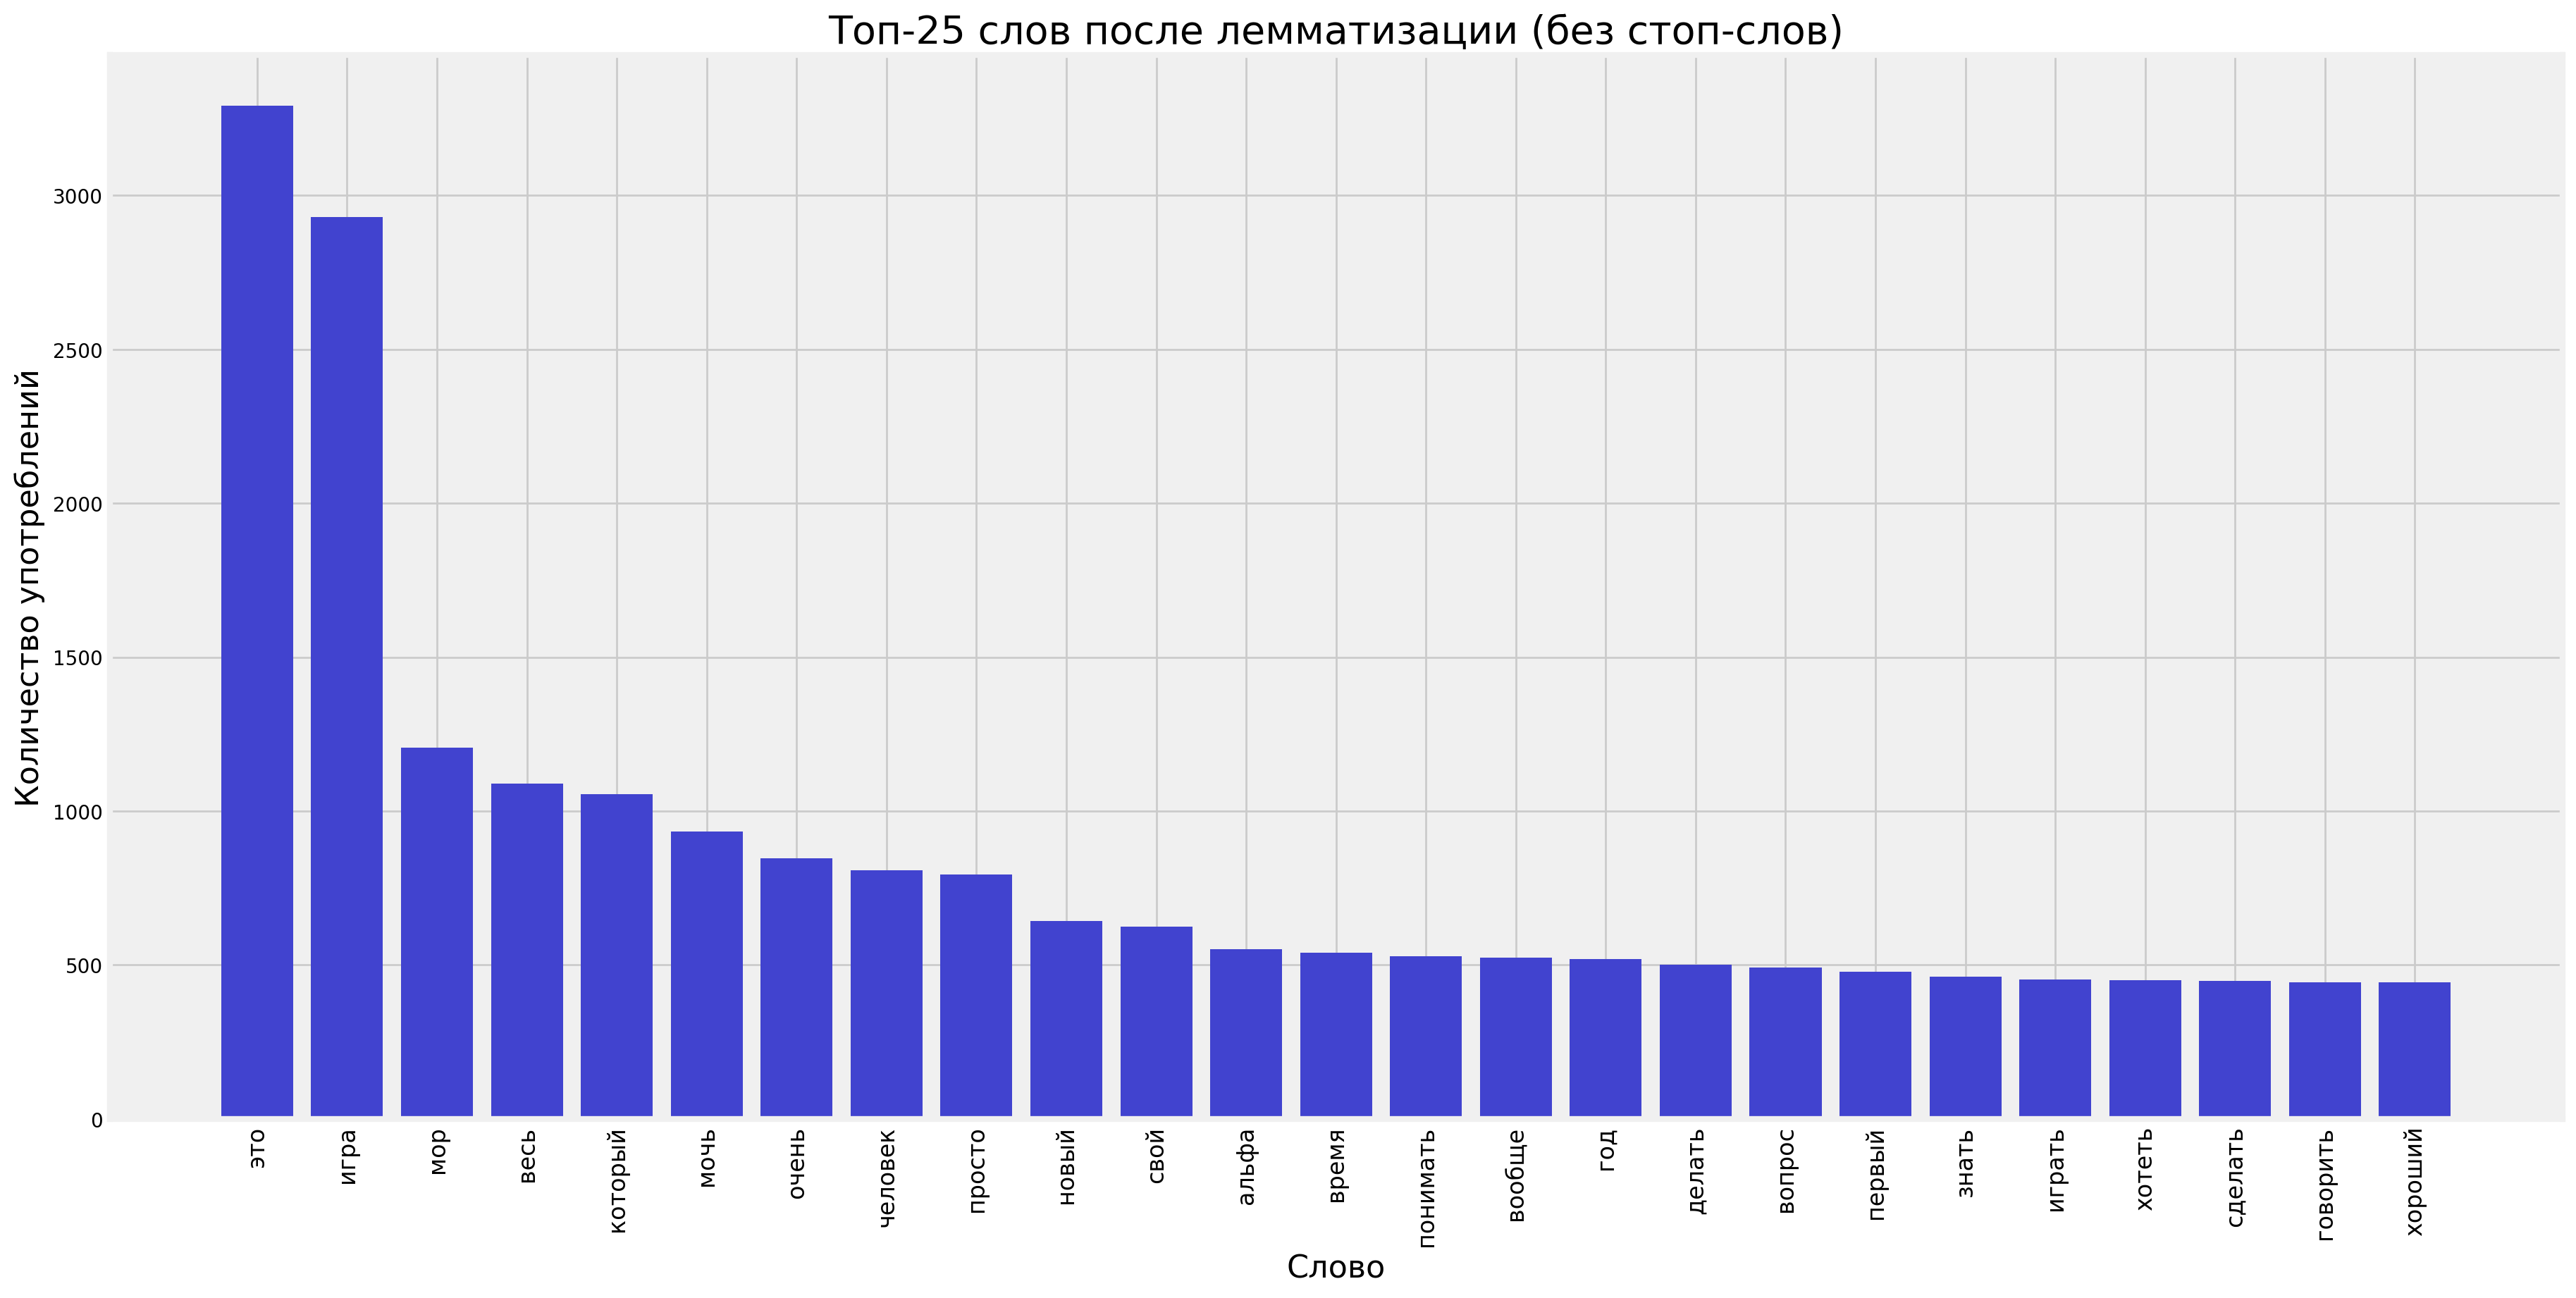

In [34]:
xlabel = [elem[0] for elem in lemm_freq_wout_stopwords[:25]]
x = range(25)
y = [elem[1] for elem in lemm_freq_wout_stopwords[:25]]

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, y, color='#4143cf')

plt.title('Топ-25 слов после лемматизации (без стоп-слов)',  fontsize=20)
plt.ylabel('Количество употреблений',  fontsize=16)
plt.xlabel('Слово',  fontsize=16)
plt.xticks(x, xlabel, rotation=90, fontsize=12)

plt.show()

In [ ]:
#from wordcloud import WordCloud